In [21]:
%pip install pytorch-forecasting
%pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\joaqu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\joaqu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.9 MB 8.3 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.9 MB 16.8 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.9 MB 10.8 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.9 MB 10.3 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 11.6 MB/s eta 0:00:00


In [3]:
import pandas as pd

# Cargar CSV
df = pd.read_csv("estacion1.csv")  # <- reemplaza con tu ruta real

# Mostrar las primeras filas
print("Primeras filas del dataset:")
display(df.head())

# Dimensiones del dataset
print("\nForma del dataset (filas, columnas):", df.shape)

# Nombre de las columnas
print("\nColumnas:", df.columns.tolist())


Primeras filas del dataset:


,id,estacion,sensor_name,sensor_dato,fecha
0,1,Estacion_01,Temp_CPU,51.1,2024-11-28 09:30:15
1,2,Estacion_01,Direccion del Viento,N,2024-11-28 09:30:15
2,3,Estacion_01,Radiacion UV,0.0,2024-11-28 09:30:15
3,4,Estacion_01,CO2,659.4,2024-11-28 09:30:15
4,5,Estacion_01,Anenometro,0.0,2024-11-28 09:30:15



Forma del dataset (filas, columnas): (485590, 5)

Columnas: ['id', 'estacion', 'sensor_name', 'sensor_dato', 'fecha']


In [4]:
# Revisar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Revisar si hay valores únicos esperados en sensor_name
print("\nSensores únicos detectados:")
print(df['sensor_name'].unique())

# Convertir columna 'fecha' a tipo datetime (si no lo está)
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')

# Confirmar conversión
print("\nTipo de dato de 'fecha' después de convertir:")
print(df['fecha'].dtype)

# Verificar si hubo problemas en la conversión (valores nulos)
print("\nValores nulos en 'fecha':", df['fecha'].isnull().sum())



Tipos de datos:
id              int64
estacion       object
sensor_name    object
sensor_dato    object
fecha          object
dtype: object

Sensores únicos detectados:
['Temp_CPU' 'Direccion del Viento' 'Radiacion UV' 'CO2' 'Anenometro'
 'Lluvia' 'Particula 10um' 'Particulas 2.5um' 'Particulas 1um' 'Luz'
 'Temperatura' 'Humedad' 'Altitud' 'Presion']

Tipo de dato de 'fecha' después de convertir:
datetime64[ns]

Valores nulos en 'fecha': 0


In [5]:
# Ver cuántos tipos únicos hay por sensor (para ver si es categórico o no)
print("\nConteo de valores únicos por sensor:")
print(df.groupby("sensor_name")["sensor_dato"].nunique())

# Intentamos convertir a numérico (los errores se vuelven NaN)
df['sensor_valor'] = pd.to_numeric(df['sensor_dato'], errors='coerce')

# Ver cuántos se pudieron convertir a numérico
num_convertidos = df['sensor_valor'].notnull().sum()
total = len(df)
print(f"\nValores numéricos detectados: {num_convertidos} de {total} totales")



Conteo de valores únicos por sensor:
sensor_name
Altitud                  1348
Anenometro               1213
CO2                      5113
Direccion del Viento        8
Humedad                   940
Lluvia                   1008
Luz                     11571
Particula 10um           1379
Particulas 1um           1009
Particulas 2.5um         1051
Presion                   160
Radiacion UV             2458
Temp_CPU                   84
Temperatura               307
Name: sensor_dato, dtype: int64

Valores numéricos detectados: 450905 de 485590 totales


In [6]:
# Dataset de sensores numéricos
df_num = df[df['sensor_valor'].notnull()].copy()

# Dataset de sensores categóricos
df_cat = df[df['sensor_valor'].isnull()].copy()

# Verificación
print("Sensores numéricos:", df_num['sensor_name'].unique())
print("Sensores categóricos:", df_cat['sensor_name'].unique())


Sensores numéricos: ['Temp_CPU' 'Radiacion UV' 'CO2' 'Anenometro' 'Lluvia' 'Particula 10um'
 'Particulas 2.5um' 'Particulas 1um' 'Luz' 'Temperatura' 'Humedad'
 'Altitud' 'Presion']
Sensores categóricos: ['Direccion del Viento']


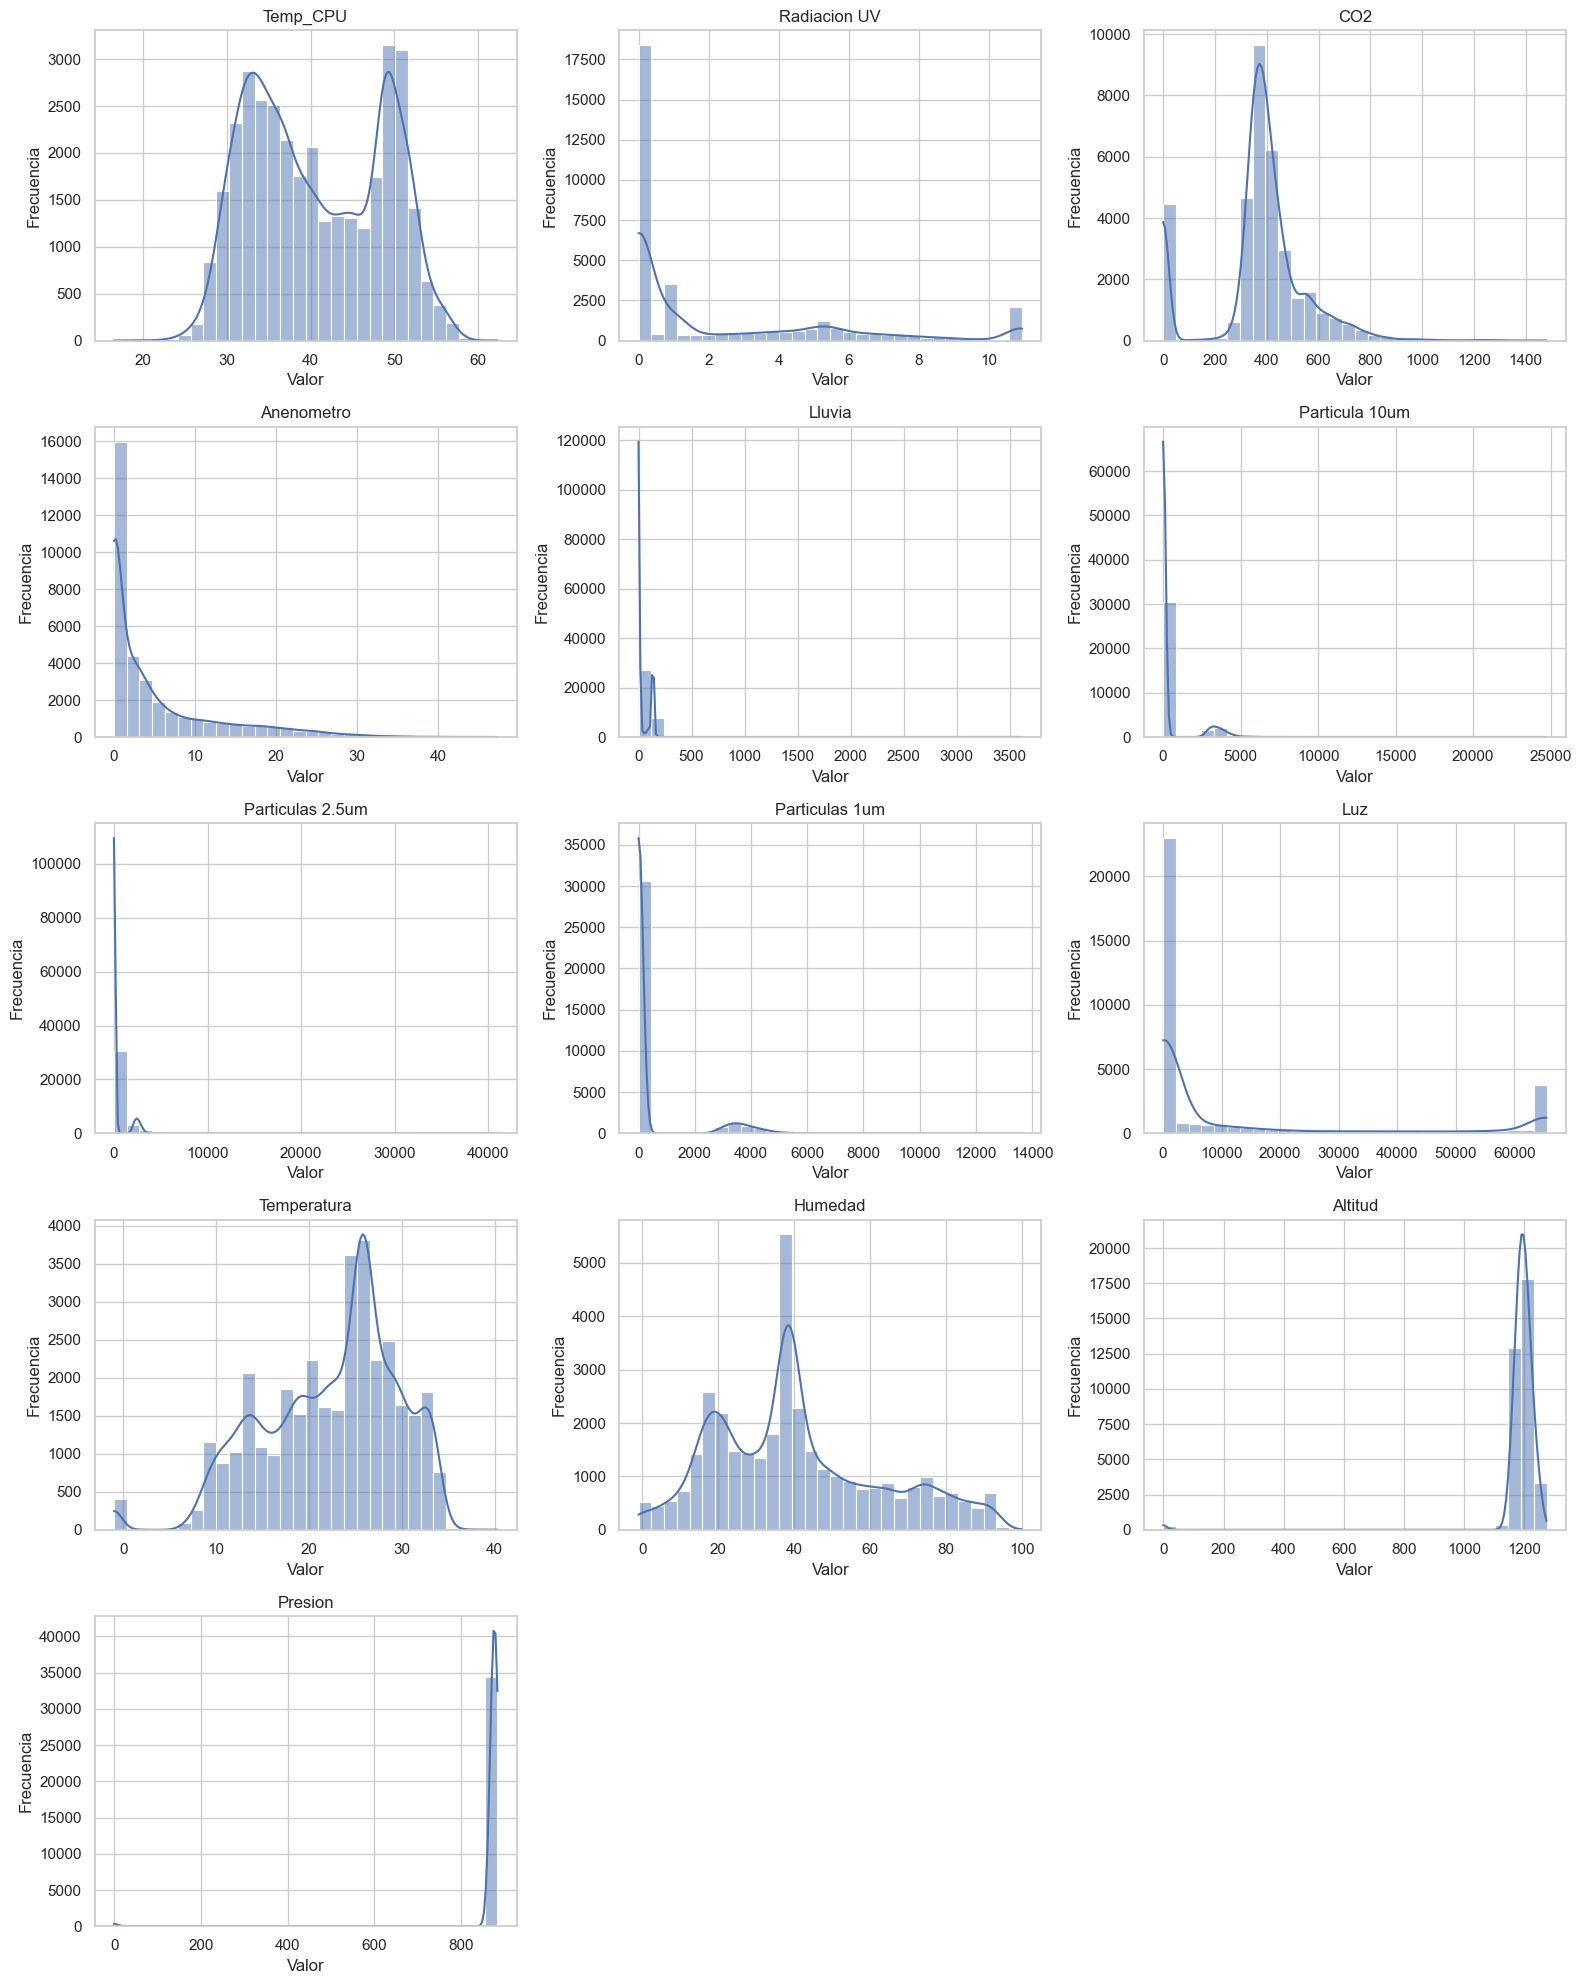

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(16, 20))

# Obtenemos todos los sensores numéricos únicos
sensores_numericos = df_num['sensor_name'].unique()

# Graficamos histogramas
for i, sensor in enumerate(sensores_numericos, 1):
    plt.subplot((len(sensores_numericos) + 2) // 3, 3, i)
    sns.histplot(df_num[df_num['sensor_name'] == sensor]['sensor_valor'], bins=30, kde=True)
    plt.title(sensor)
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


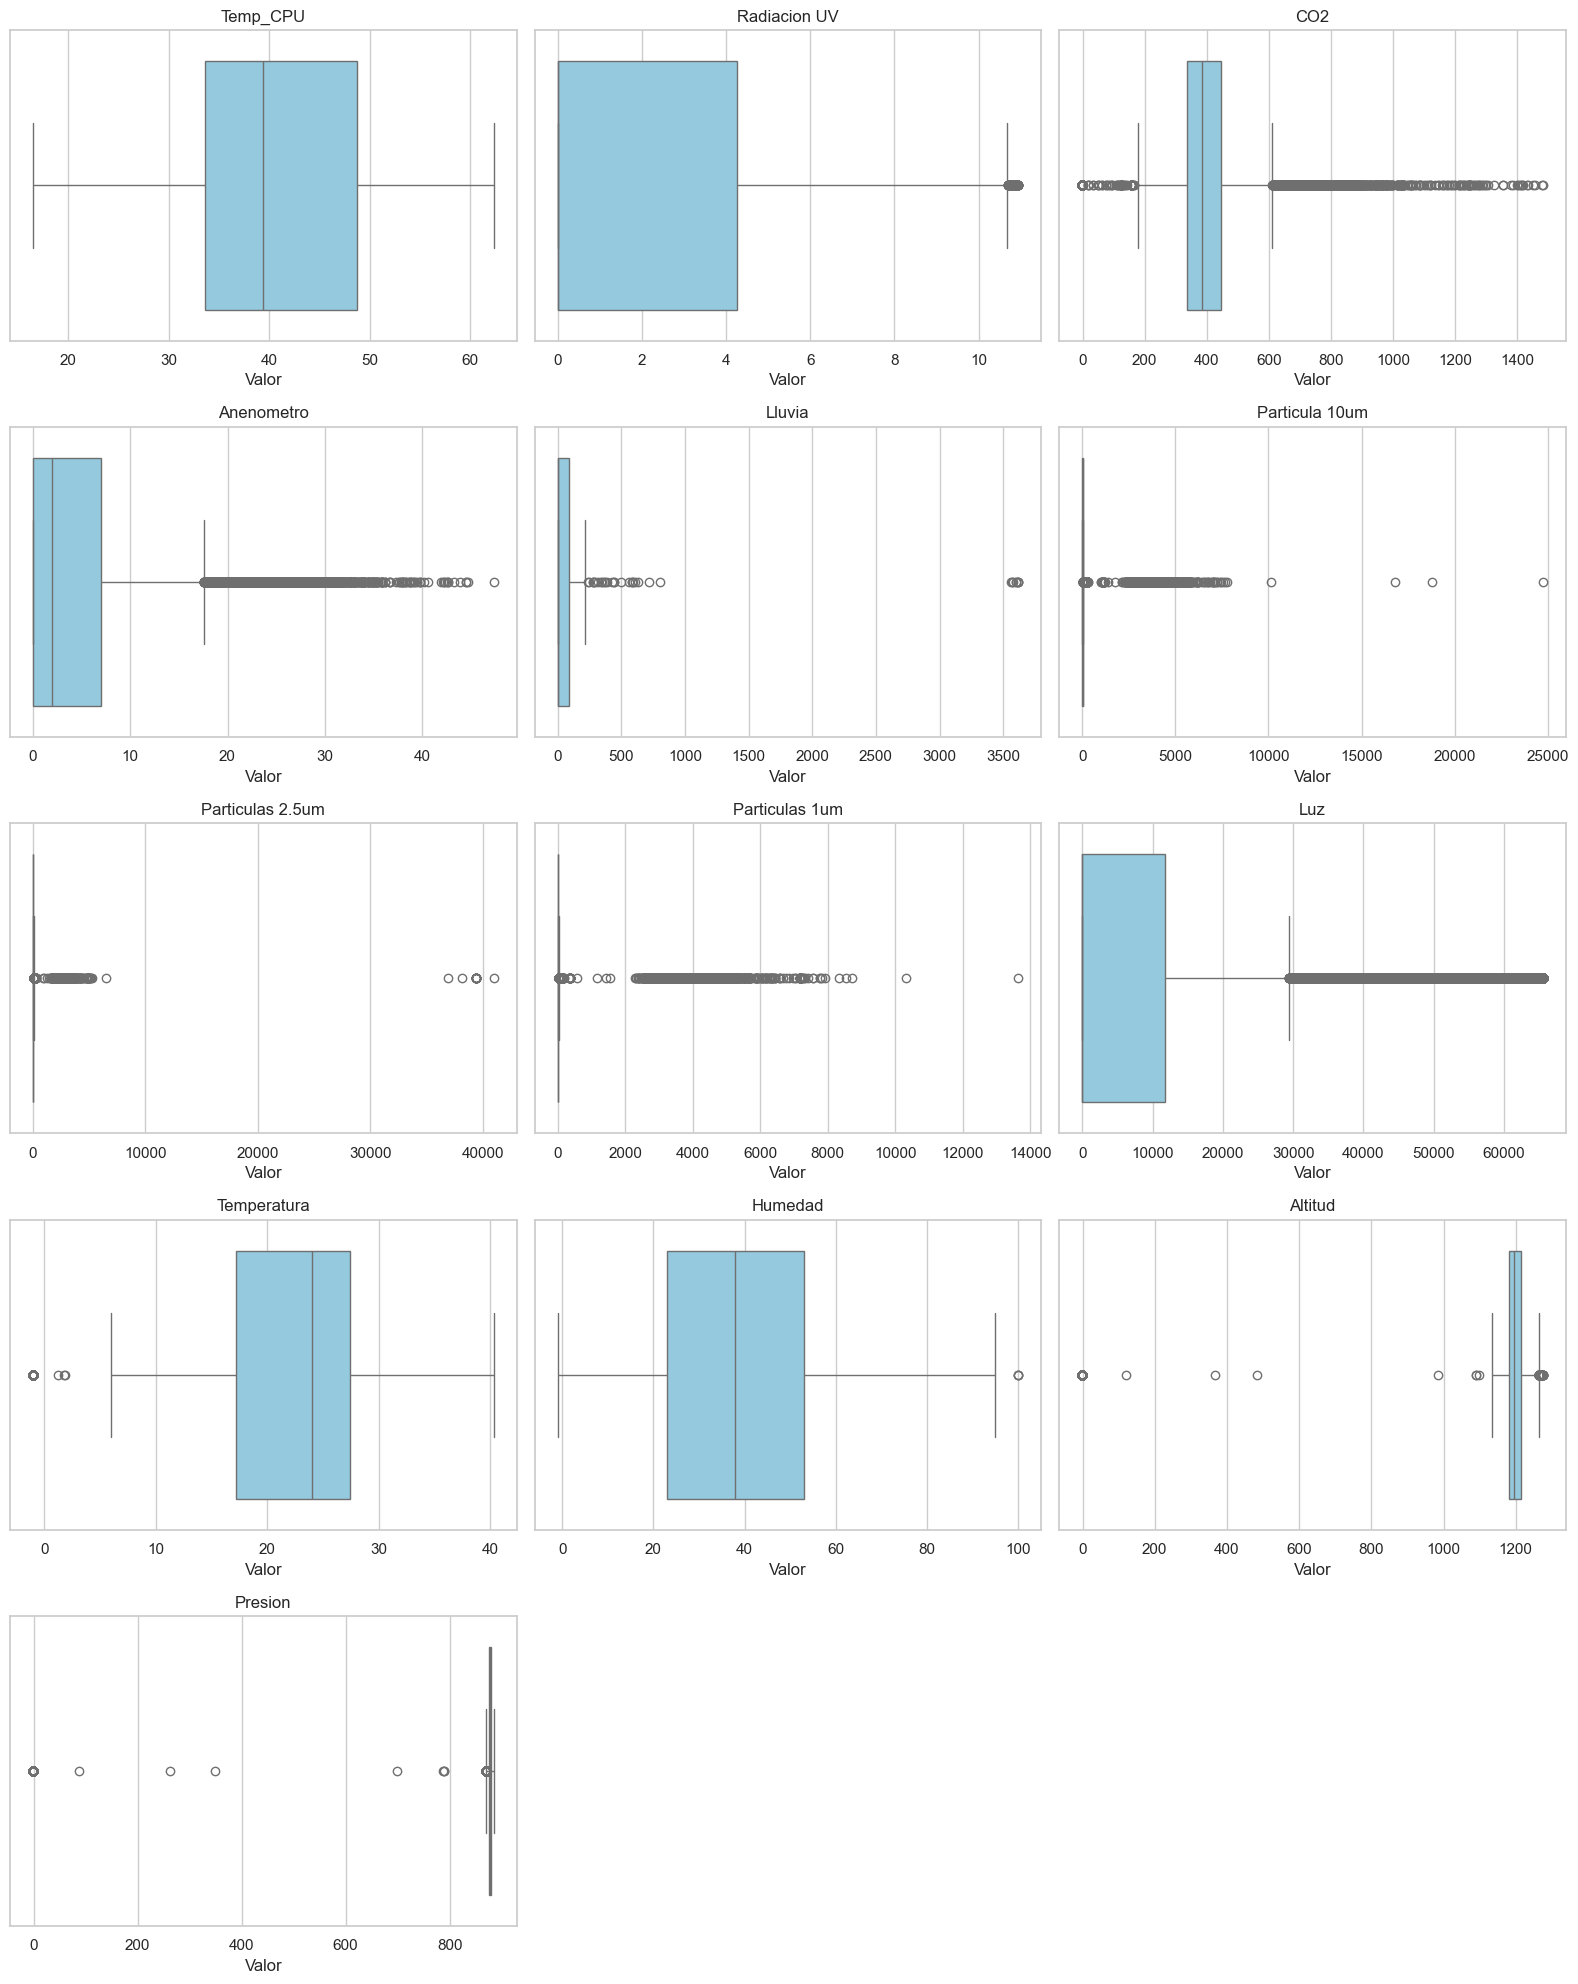

In [8]:
plt.figure(figsize=(16, 20))
for i, sensor in enumerate(sensores_numericos, 1):
    plt.subplot((len(sensores_numericos) + 2) // 3, 3, i)
    sns.boxplot(
        data=df_num[df_num["sensor_name"] == sensor],
        x="sensor_valor",
        orient="h",
        color='skyblue'
    )
    plt.title(sensor)
    plt.xlabel("Valor")

plt.tight_layout()
plt.show()


In [9]:
# Agrupar por sensor y calcular métricas para cada uno
summary_list = []

for sensor in df['sensor_name'].unique():
    valores = df[df['sensor_name'] == sensor]['sensor_valor'].dropna()
    
    if valores.empty:
        continue
    
    Q1 = valores.quantile(0.25)
    Q3 = valores.quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    
    outliers_abajo = (valores < lim_inf).sum()
    outliers_arriba = (valores > lim_sup).sum()
    total_outliers = outliers_abajo + outliers_arriba
    total_valores = len(valores)
    porcentaje_outliers = (total_outliers / total_valores) * 100
    
    summary_list.append({
        "Sensor": sensor,
        "Count": total_valores,
        "Min": valores.min(),
        "Q1": Q1,
        "Mediana": valores.median(),
        "Q3": Q3,
        "Max": valores.max(),
        "IQR": IQR,
        "Lim. Inferior": lim_inf,
        "Lim. Superior": lim_sup,
        "Outliers Abajo": outliers_abajo,
        "Outliers Arriba": outliers_arriba,
        "Outliers (%)": round(porcentaje_outliers, 2)
    })

# Crear DataFrame resumen
df_outliers = pd.DataFrame(summary_list)

# Ordenar por porcentaje de outliers descendente
df_outliers = df_outliers.sort_values(by="Outliers (%)", ascending=False)

# Mostrar tabla
import pandas as pd
pd.set_option('display.max_rows', None)
display(df_outliers)


,Sensor,Count,Min,Q1,Mediana,Q3,Max,IQR,Lim. Inferior,Lim. Superior,Outliers Abajo,Outliers Arriba,Outliers (%)
2,CO2,34685,-1.0,337.9,383.20,447.30,1481.50,109.40,173.800,611.400,4507,2660,20.66
8,Luz,34685,-1.0,0.0,2.20,11753.10,65492.00,11753.10,-17629.650,29382.750,0,6468,18.65
5,Particula 10um,34685,-1.0,8.0,17.50,30.60,24729.60,22.60,-25.900,64.500,0,5243,15.12
7,Particulas 1um,34685,-1.0,5.0,11.10,18.80,13640.20,13.80,-15.700,39.500,0,5108,14.73
6,Particulas 2.5um,34685,-1.0,7.0,15.80,26.70,40961.70,19.70,-22.550,56.250,0,4739,13.66
3,Anenometro,34685,0.0,0.0,2.00,7.04,47.36,7.04,-10.560,17.600,0,3031,8.74
1,Radiacion UV,34685,0.0,0.0,0.02,4.27,10.94,4.27,-6.405,10.675,0,2058,5.93
9,Temperatura,34685,-1.0,17.2,24.00,27.40,40.30,10.20,1.900,42.700,403,0,1.16
12,Presion,34685,-1.0,875.7,877.60,879.20,884.30,3.50,870.450,884.450,396,0,1.14
11,Altitud,34685,-1.0,1180.4,1195.80,1213.60,1274.80,33.20,1130.600,1263.400,265,127,1.13


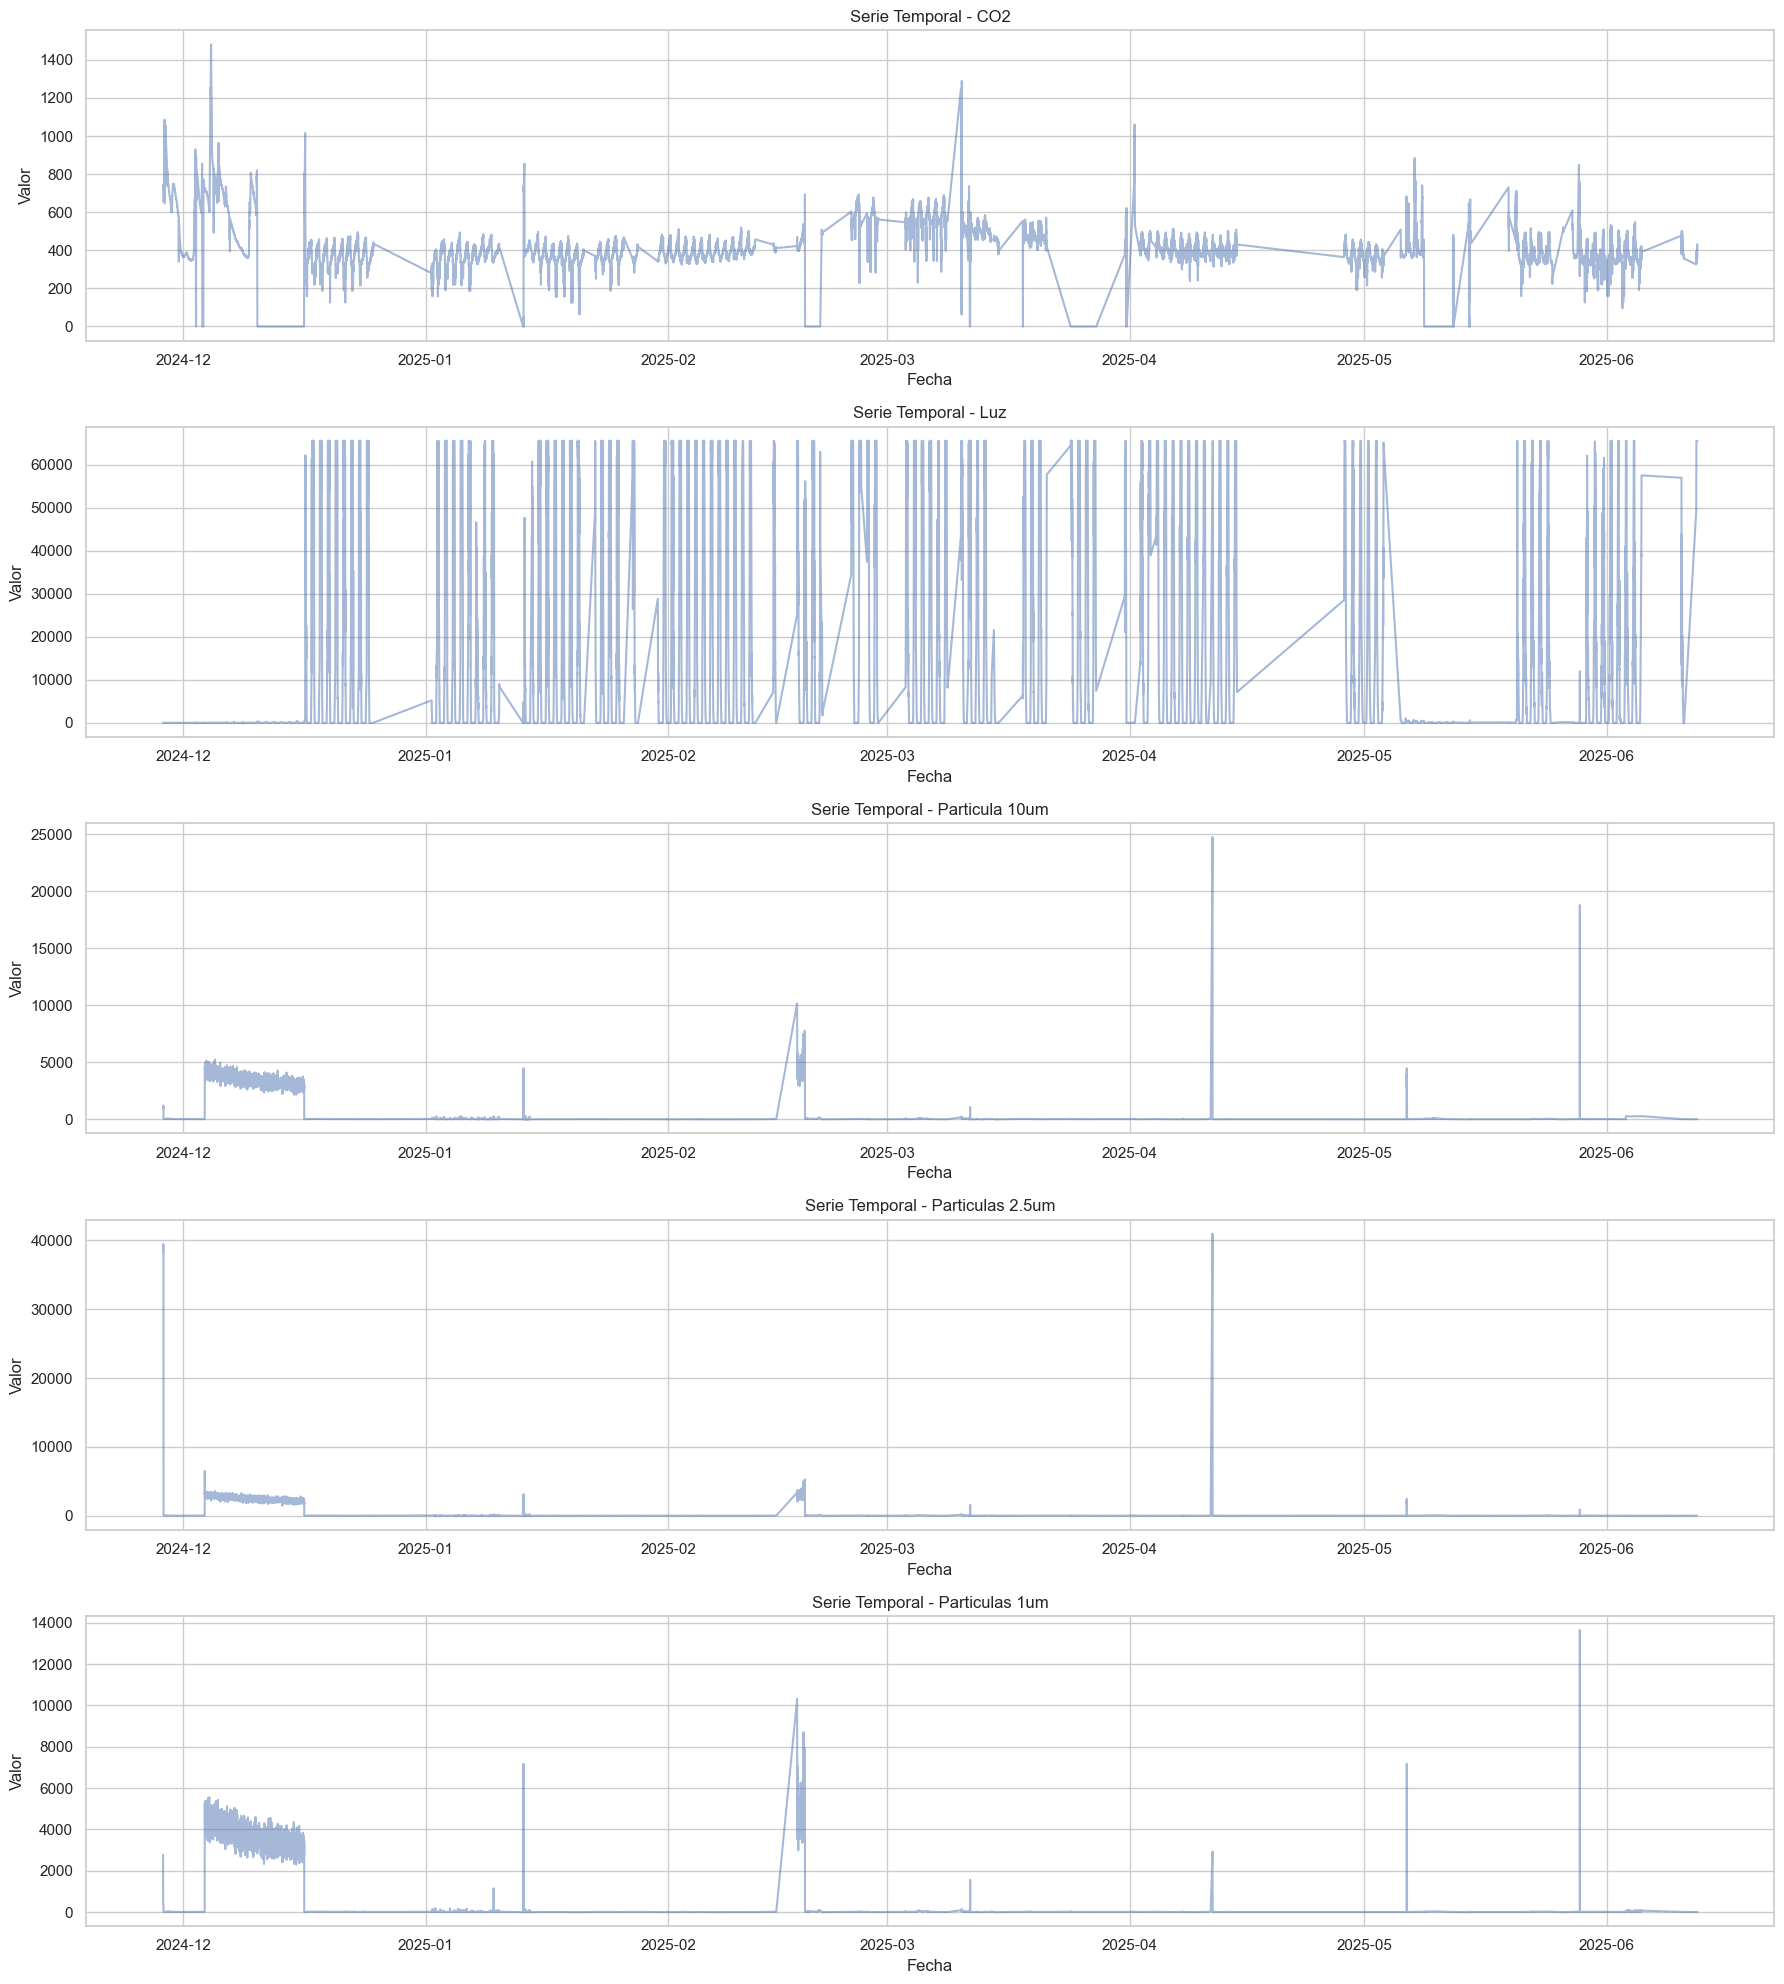

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegura orden temporal
df = df.sort_values("fecha")

# Lista de sensores con más outliers
sensores_outliers = ['CO2', 'Luz', 'Particula 10um', 'Particulas 2.5um', 'Particulas 1um']

# Tamaño general del plot
plt.figure(figsize=(18, 20))

for i, sensor in enumerate(sensores_outliers, 1):
    plt.subplot(len(sensores_outliers), 1, i)
    datos = df[df['sensor_name'] == sensor]
    plt.plot(datos['fecha'], datos['sensor_valor'], alpha=0.5)
    plt.title(f"Serie Temporal - {sensor}")
    plt.ylabel("Valor")
    plt.xlabel("Fecha")
    plt.tight_layout()

plt.show()


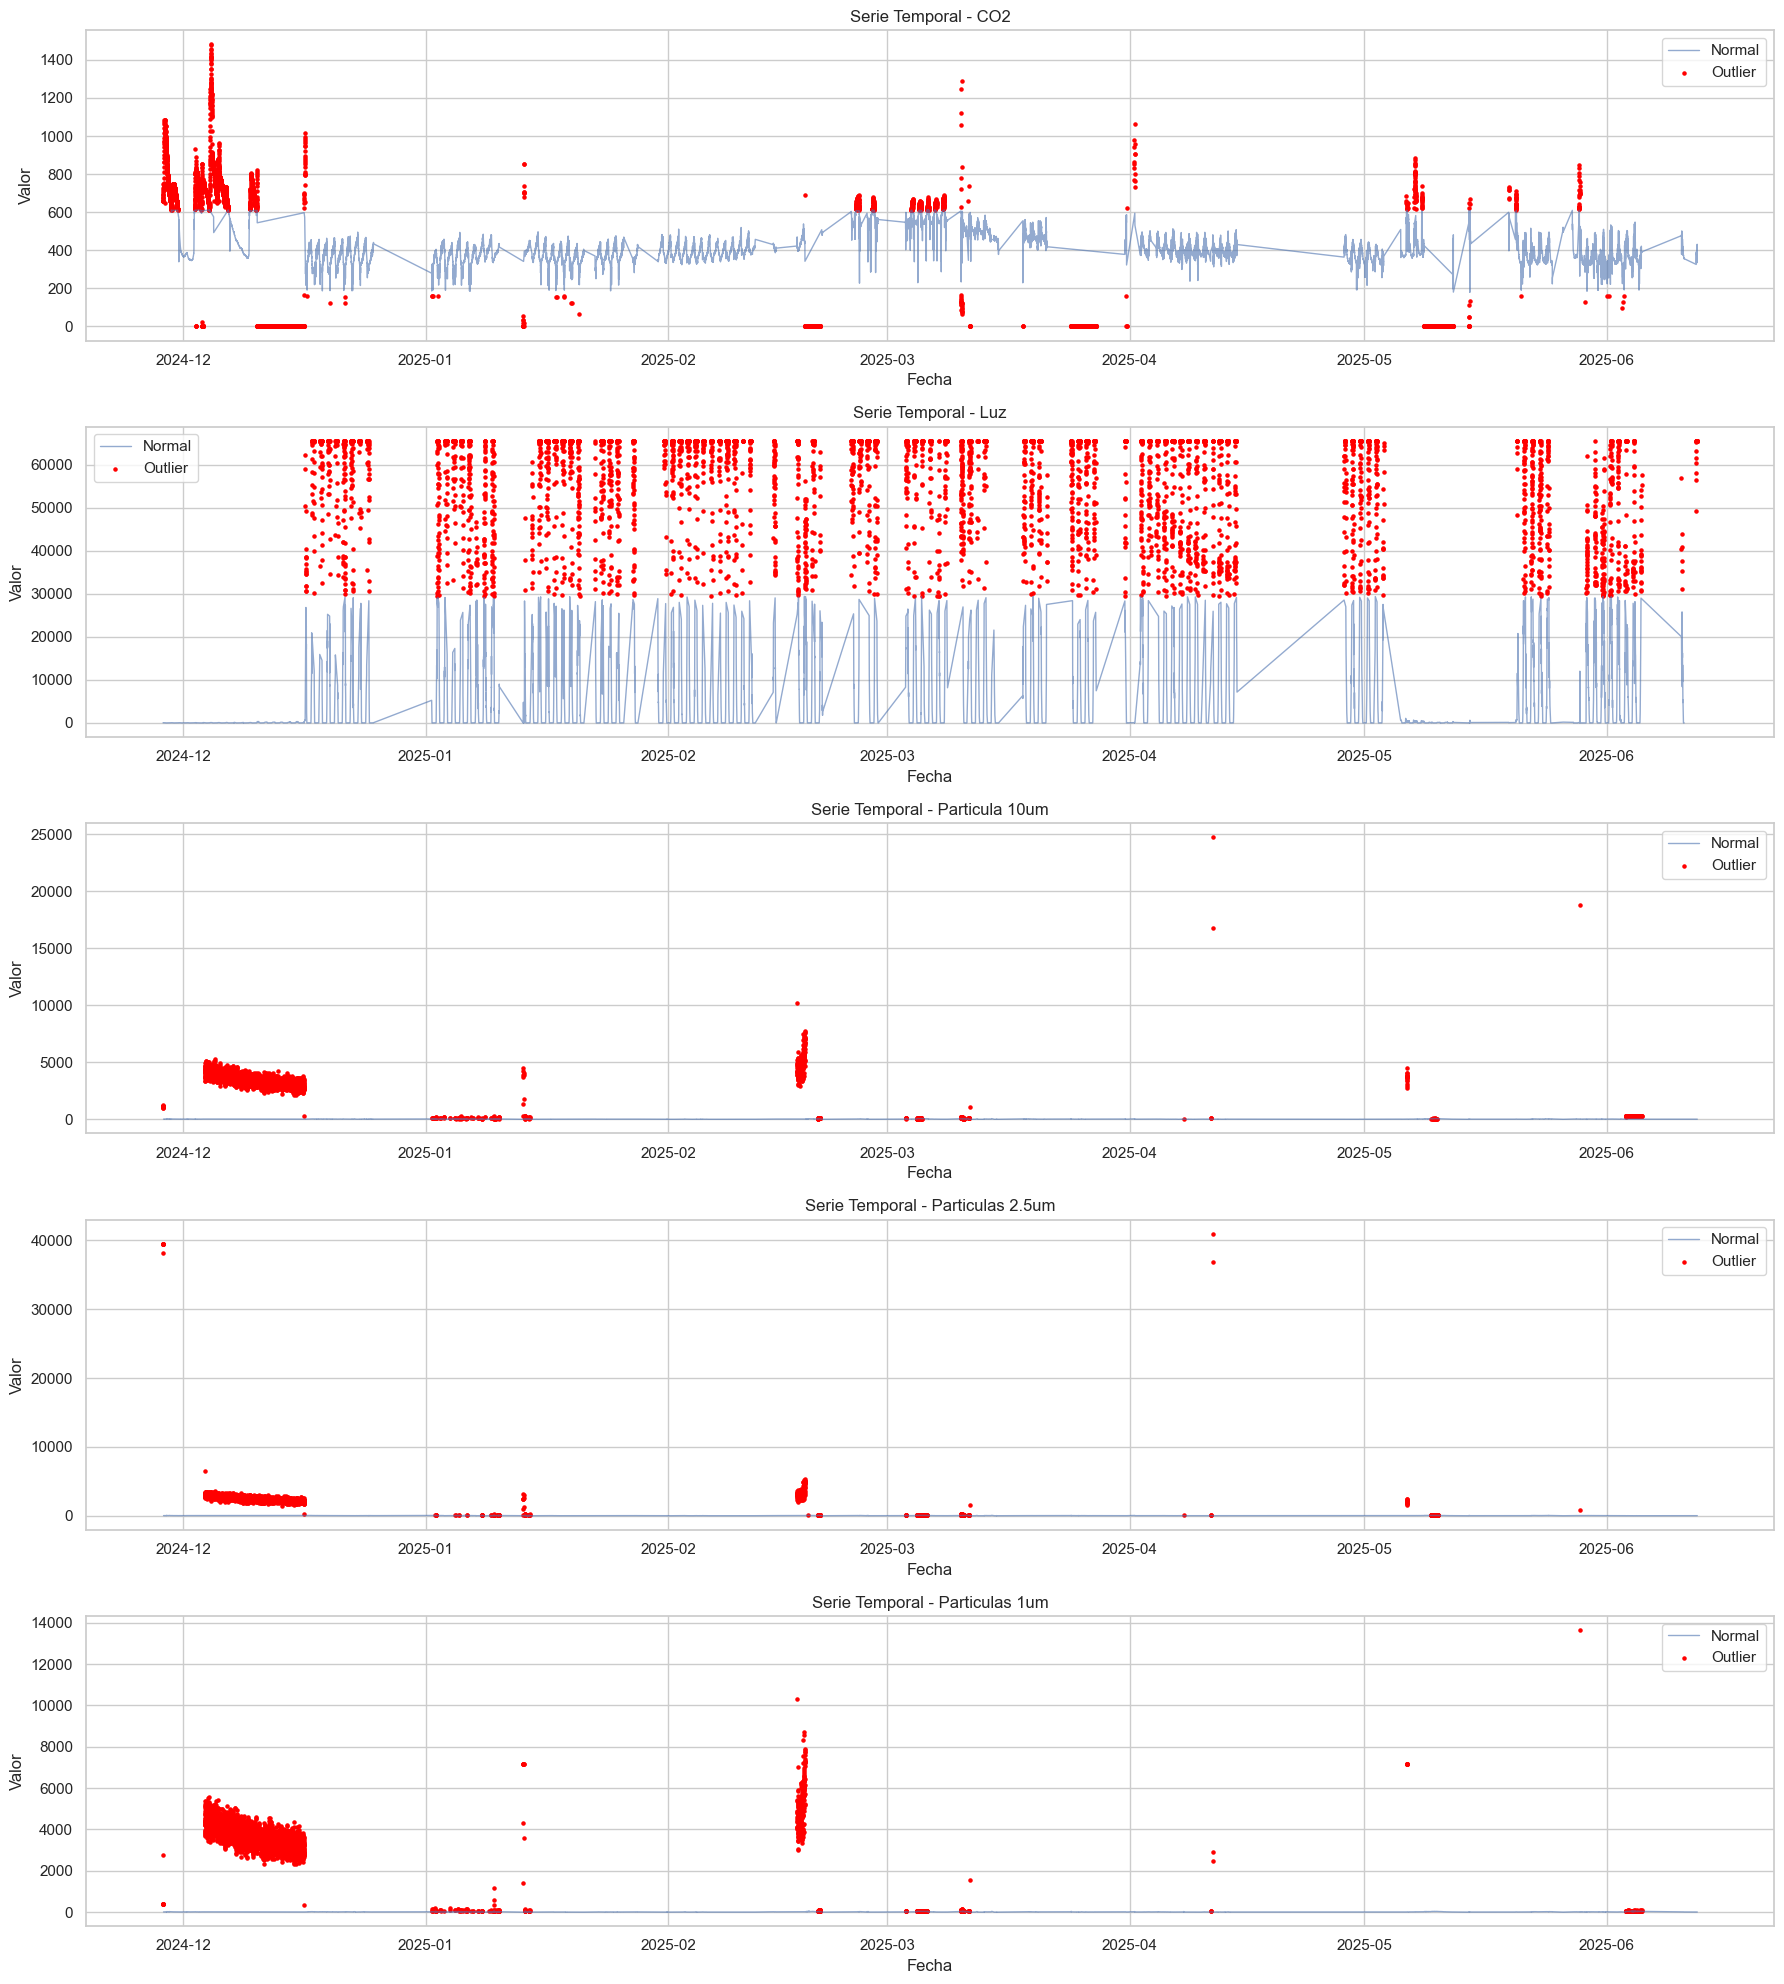

In [11]:
import matplotlib.pyplot as plt

# Diccionario con los límites IQR por sensor
limites_iqr = {
    'CO2': (173.8, 611.4),
    'Luz': (-17629.65, 29382.75),
    'Particula 10um': (-25.9, 64.5),
    'Particulas 2.5um': (-22.55, 56.25),
    'Particulas 1um': (-15.7, 39.5)
}

# Sensores a graficar
sensores_outliers = list(limites_iqr.keys())

plt.figure(figsize=(18, 20))

for i, sensor in enumerate(sensores_outliers, 1):
    plt.subplot(len(sensores_outliers), 1, i)
    datos = df[df['sensor_name'] == sensor].sort_values("fecha")

    # Límites de IQR
    lim_inf, lim_sup = limites_iqr[sensor]

    # Separar normales y outliers
    normales = datos[(datos['sensor_valor'] >= lim_inf) & (datos['sensor_valor'] <= lim_sup)]
    outliers = datos[(datos['sensor_valor'] < lim_inf) | (datos['sensor_valor'] > lim_sup)]

    # Graficar normales
    plt.plot(normales['fecha'], normales['sensor_valor'], label='Normal', alpha=0.6, linewidth=1)

    # Graficar outliers
    plt.scatter(outliers['fecha'], outliers['sensor_valor'], color='red', label='Outlier', s=5)

    plt.title(f"Serie Temporal - {sensor}")
    plt.ylabel("Valor")
    plt.xlabel("Fecha")
    plt.legend()
    plt.tight_layout()

plt.show()


In [12]:
# Asegurarnos de que 'fecha' esté en formato datetime y ordenado
df['fecha'] = pd.to_datetime(df['fecha'])
df = df.sort_values('fecha')

# Filtrar solo los sensores con datos numéricos válidos
df_num = df[df['sensor_valor'].notnull()]

# Pivotear: cada fila será una fecha, y cada columna un sensor
df_pivot = df_num.pivot(index='fecha', columns='sensor_name', values='sensor_valor')


In [13]:
# Calcular matriz de correlación
correlation_matrix = df_pivot.corr()


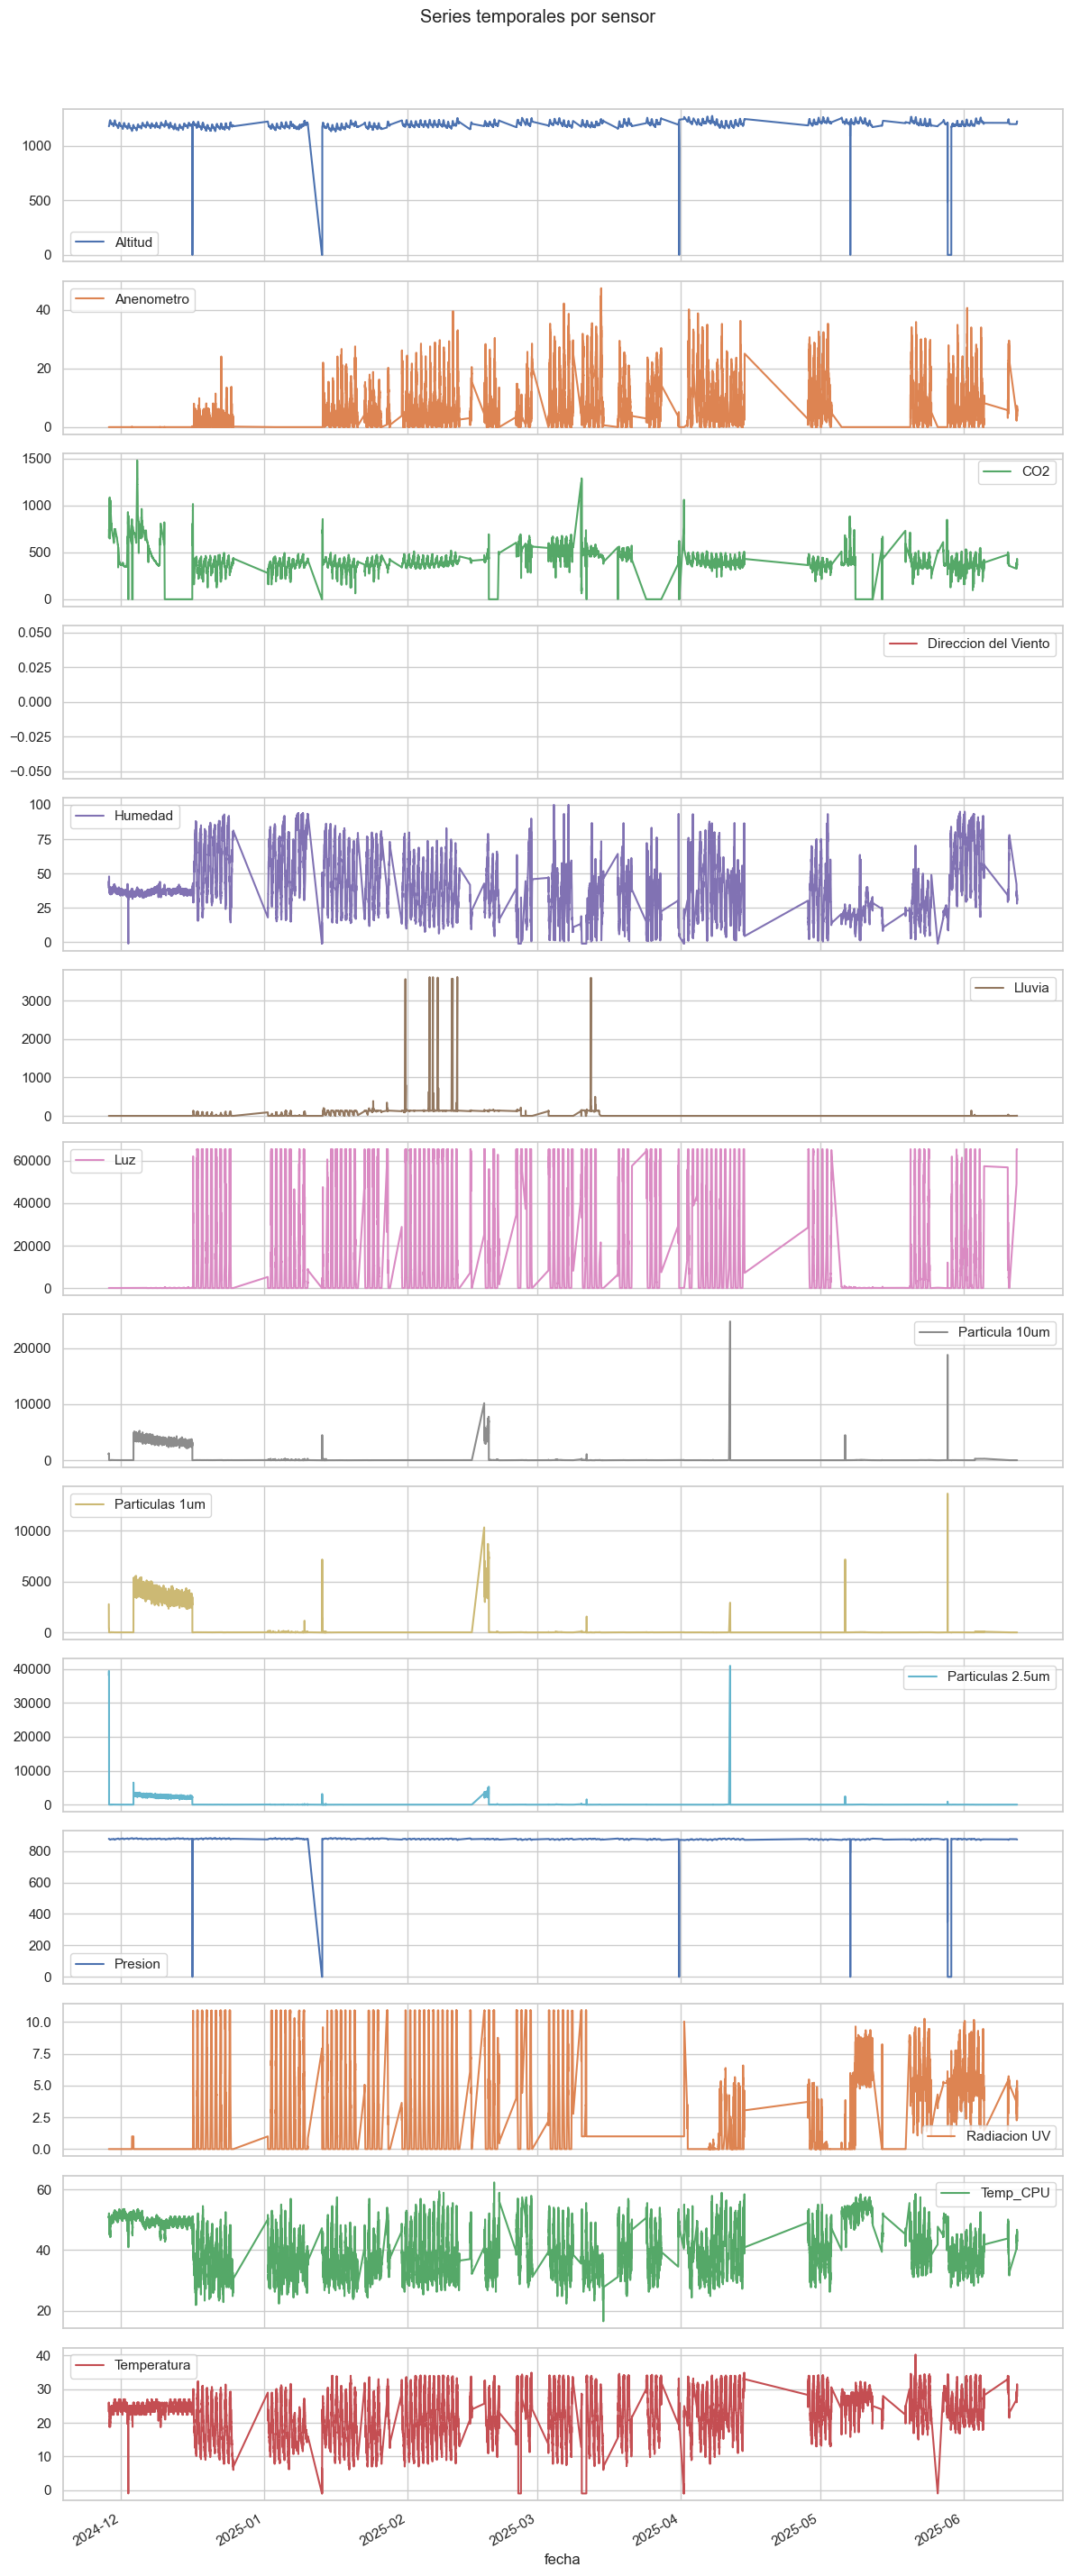

In [20]:
import pandas as pd

dfa = pd.read_csv('estacion1.csv', parse_dates=['fecha'])

# Pivot
pivot_dfa = dfa.pivot(index='fecha', columns='sensor_name', values='sensor_dato')

# Convertir a numérico donde sea posible (forzando errores a NaN)
pivot_dfa = pivot_dfa.apply(pd.to_numeric, errors='coerce')

# Visualizar solo sensores numéricos
pivot_dfa.plot(subplots=True, figsize=(12, 2 * len(pivot_dfa.columns)), sharex=True)
plt.suptitle('Series temporales por sensor', y=1.02)
plt.tight_layout()
plt.show()

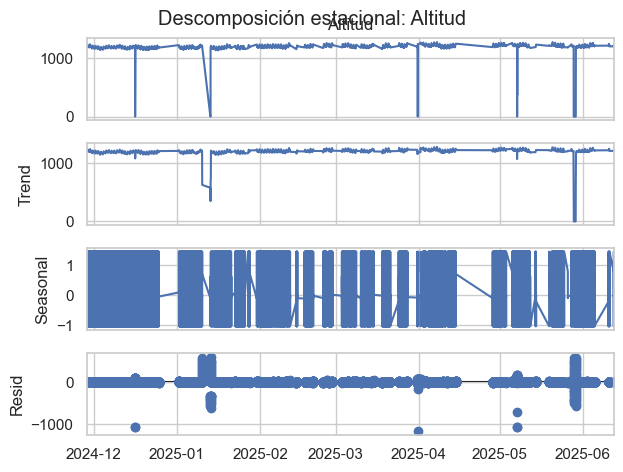

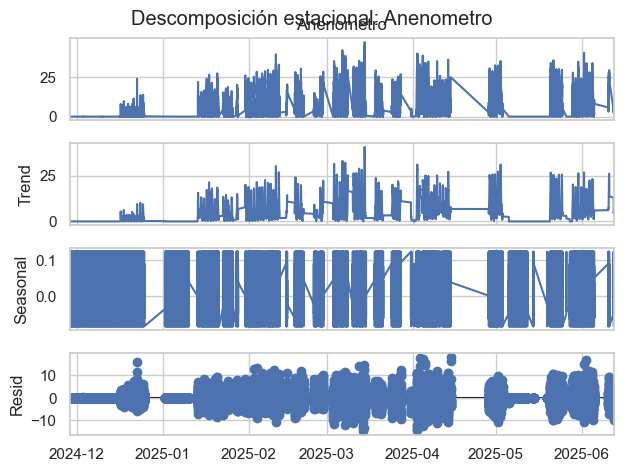

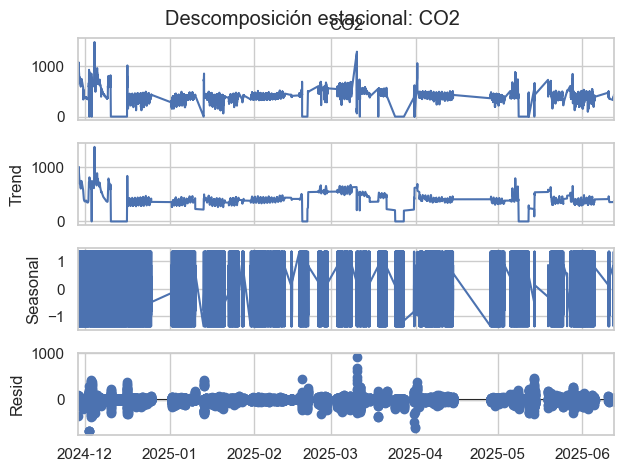

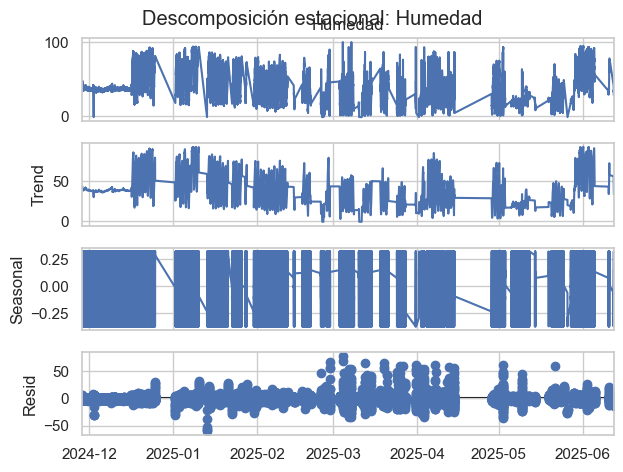

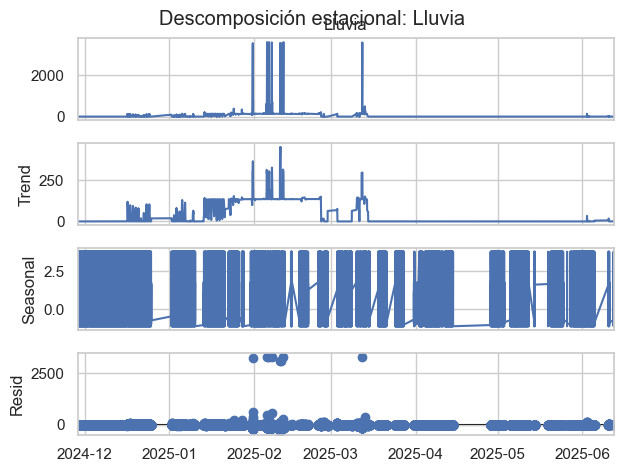

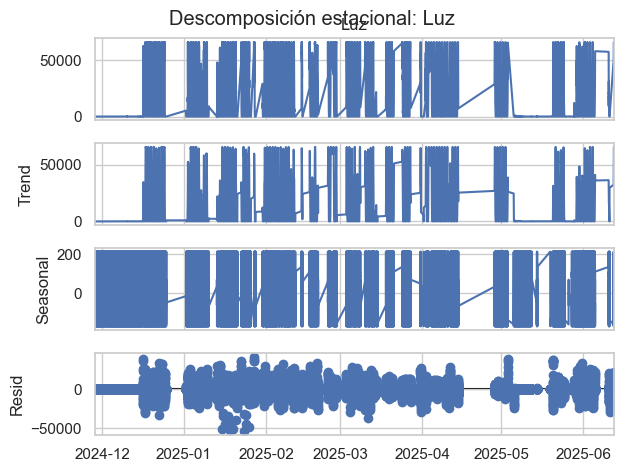

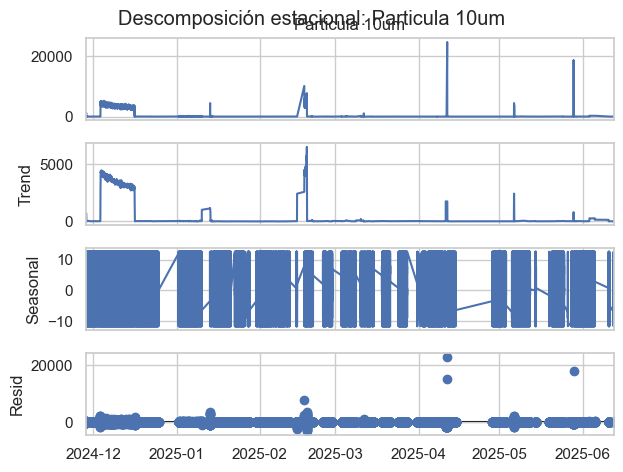

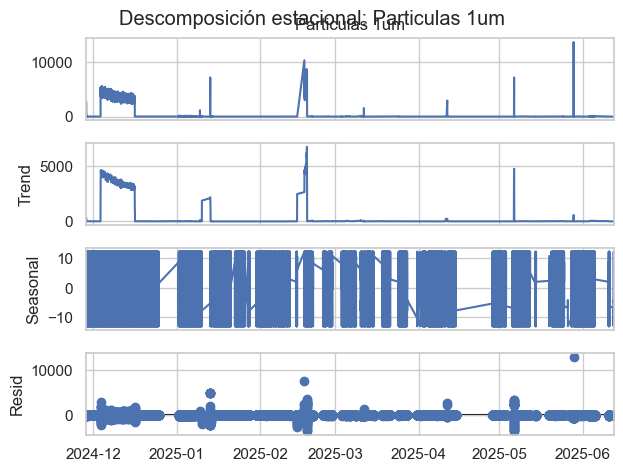

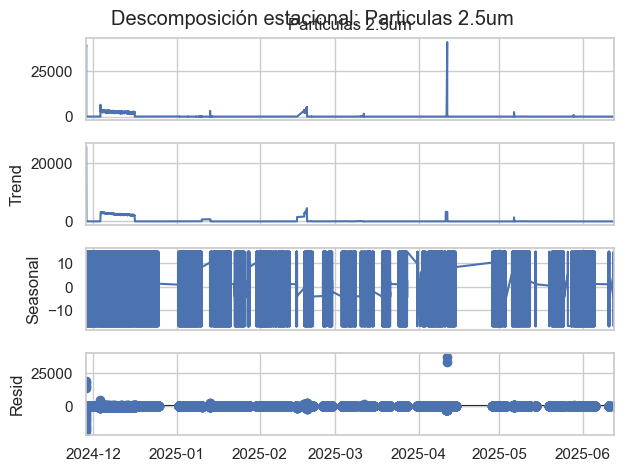

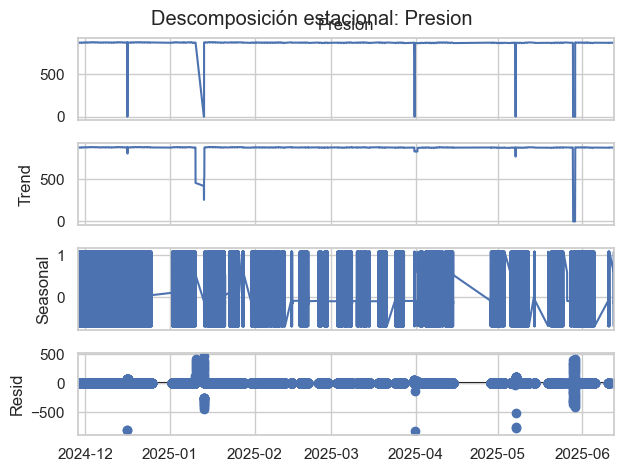

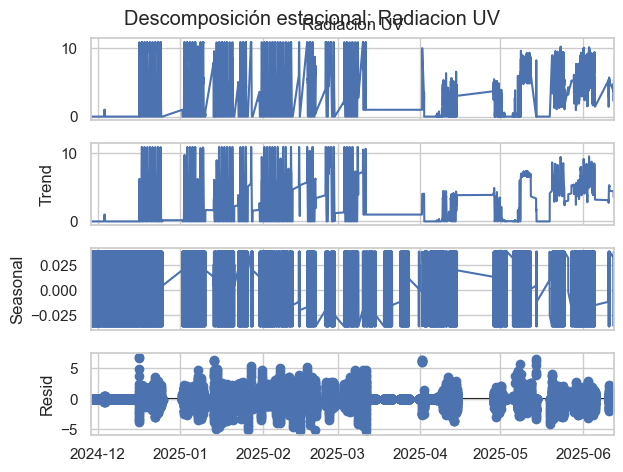

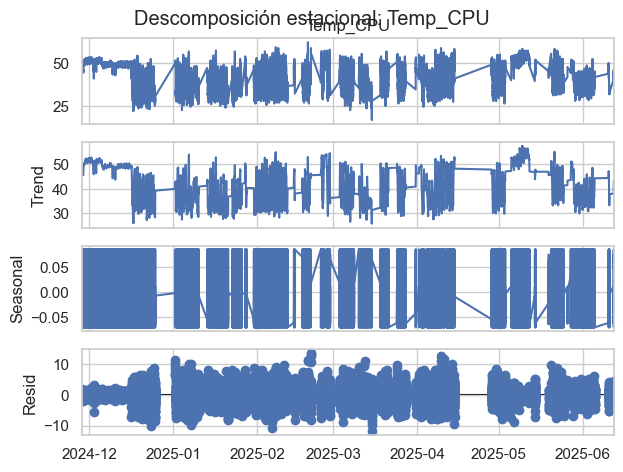

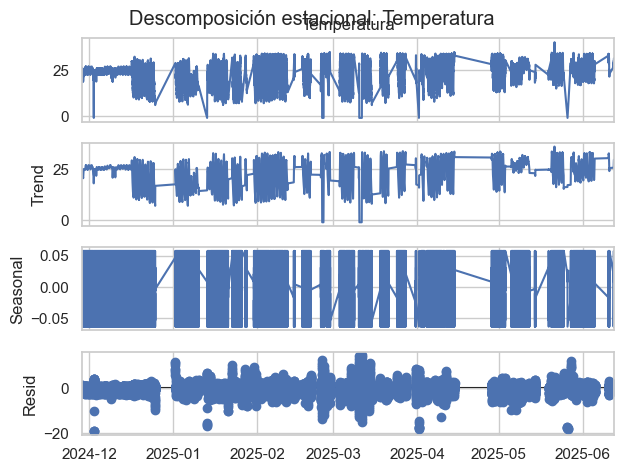

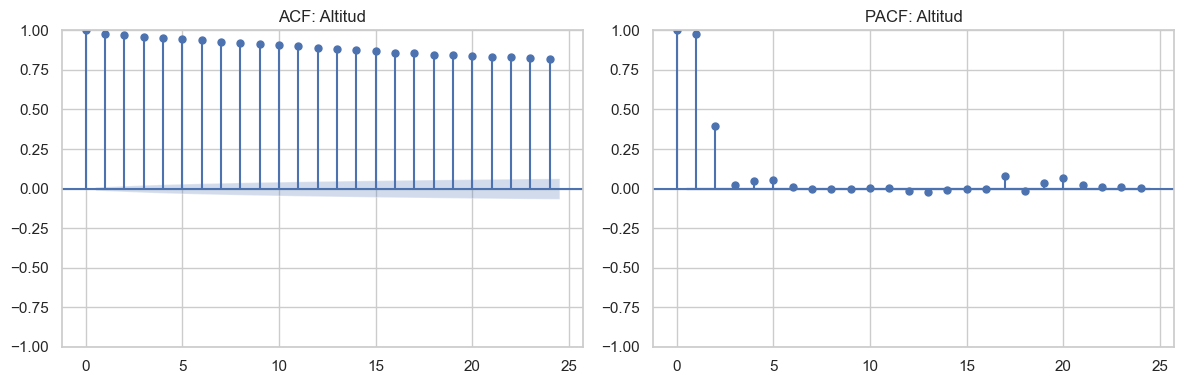

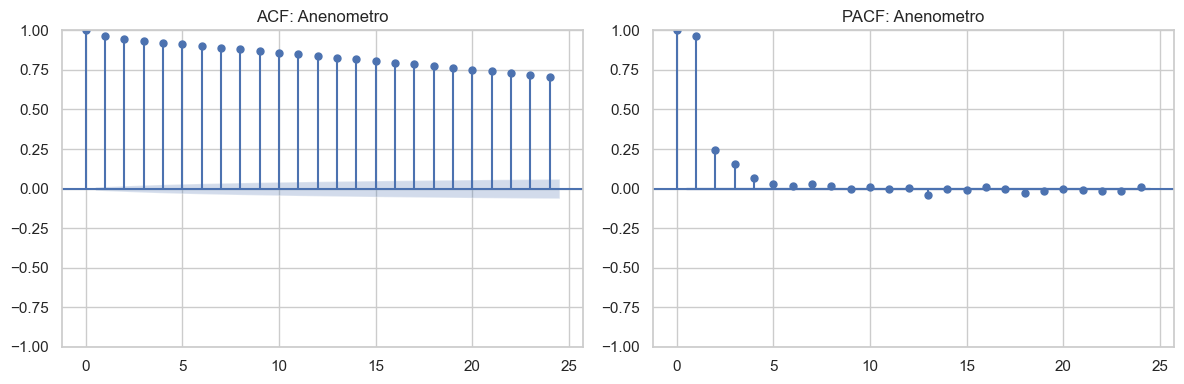

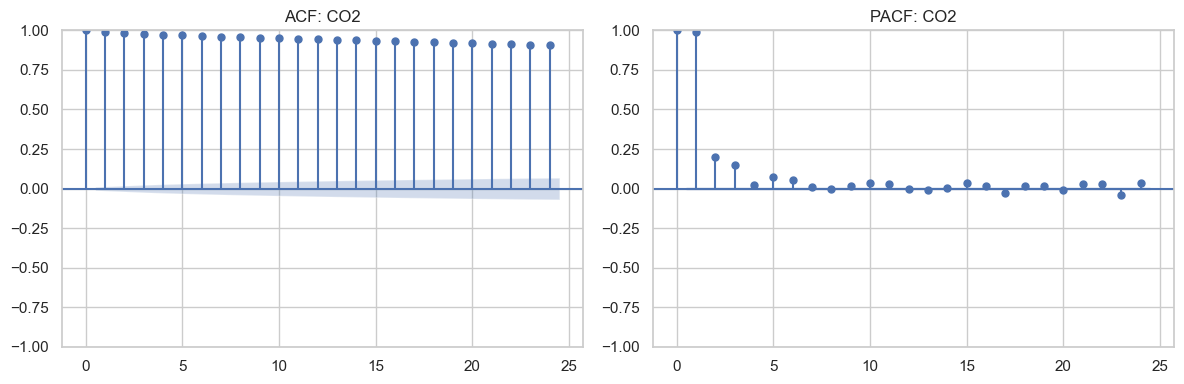

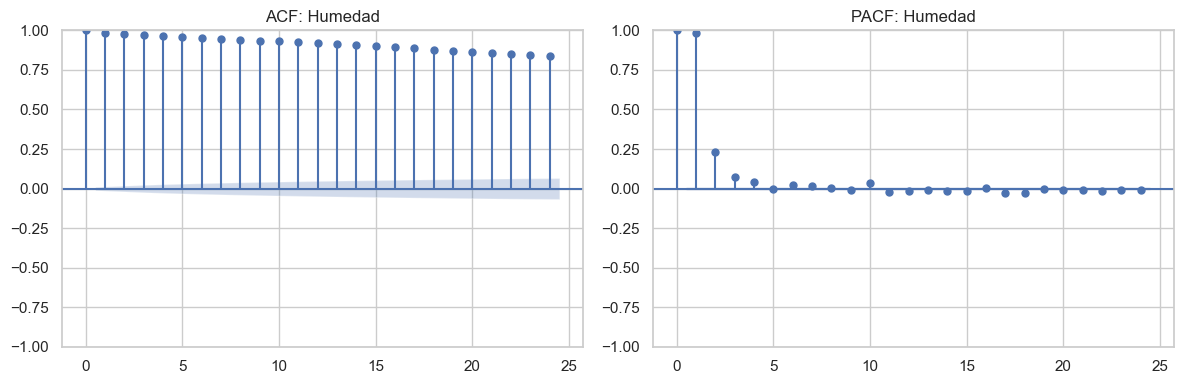

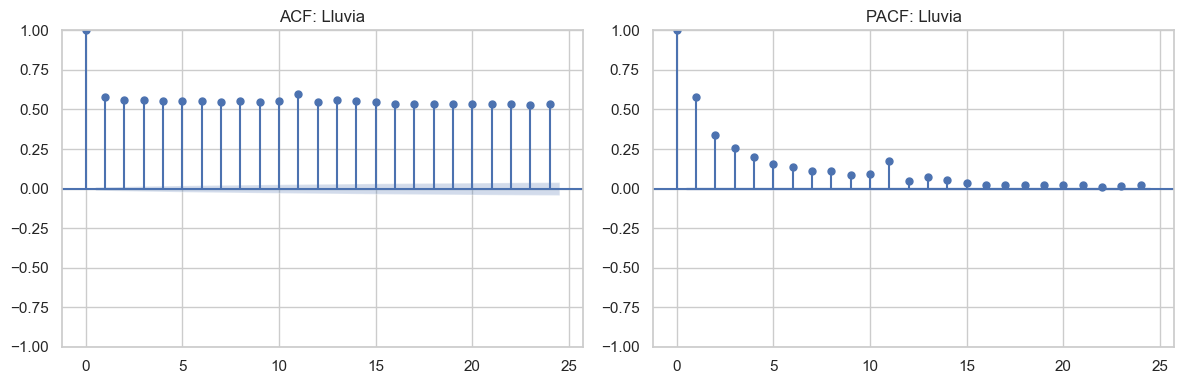

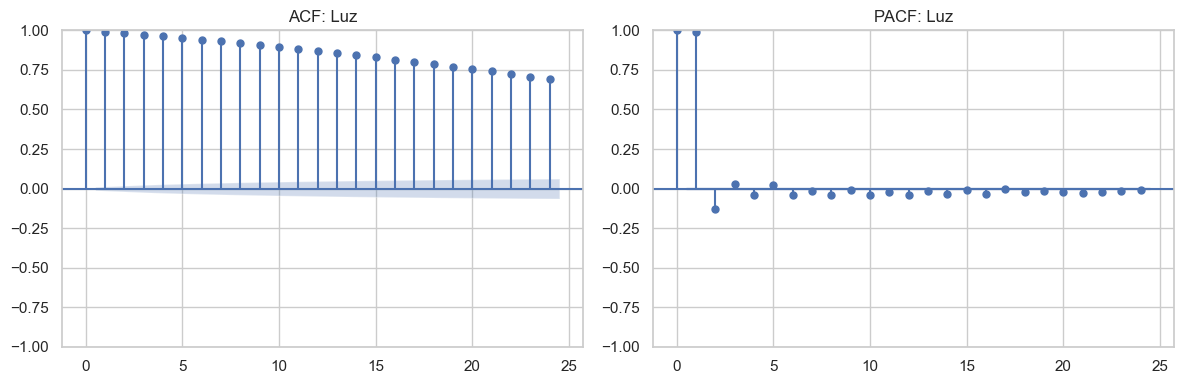

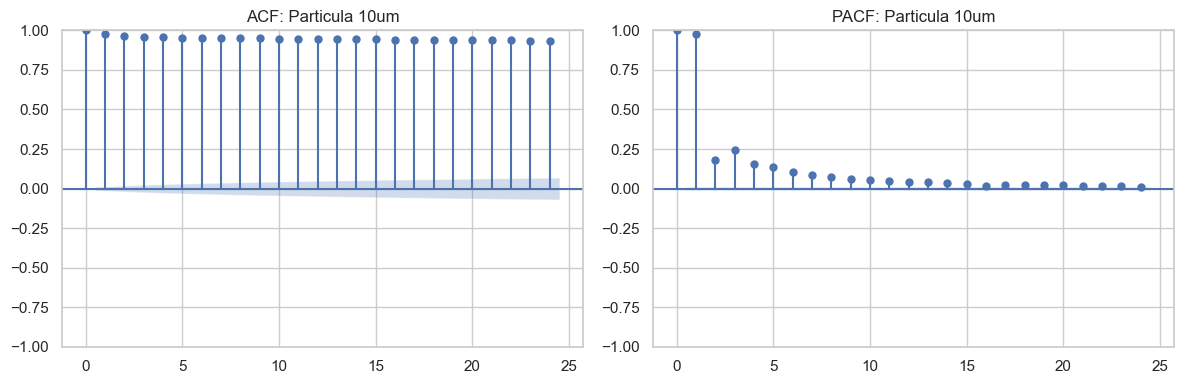

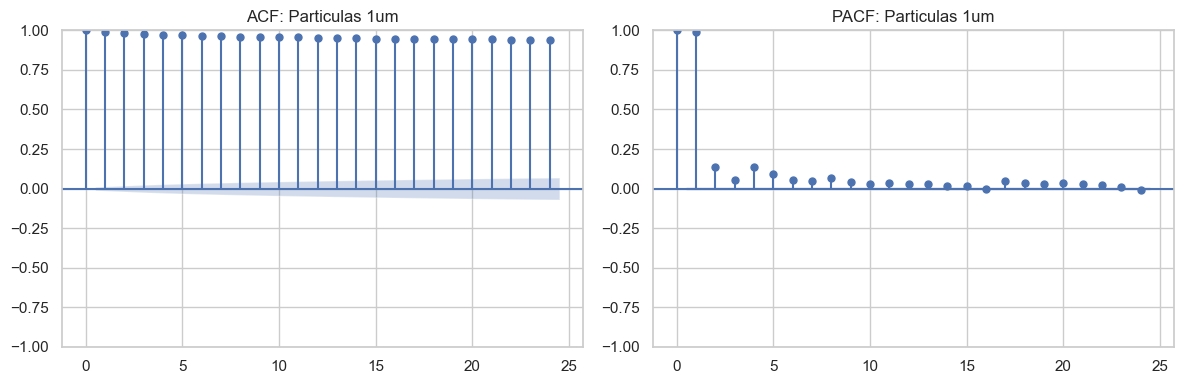

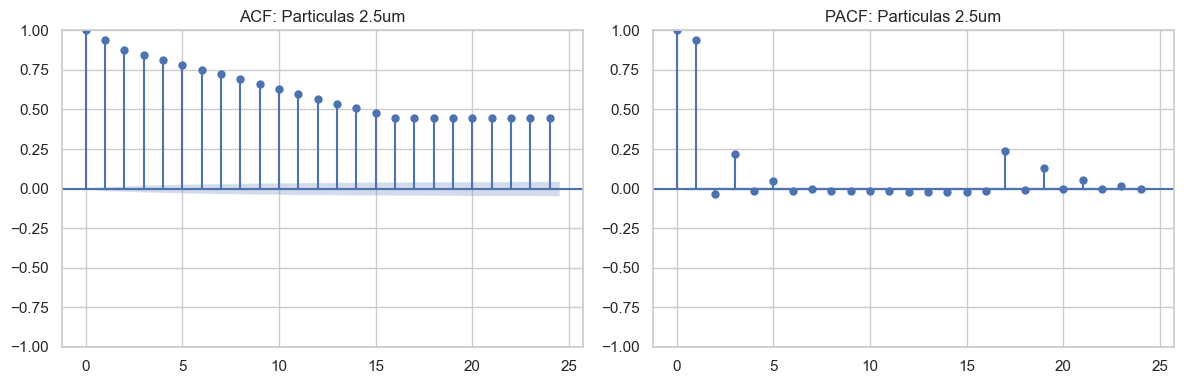

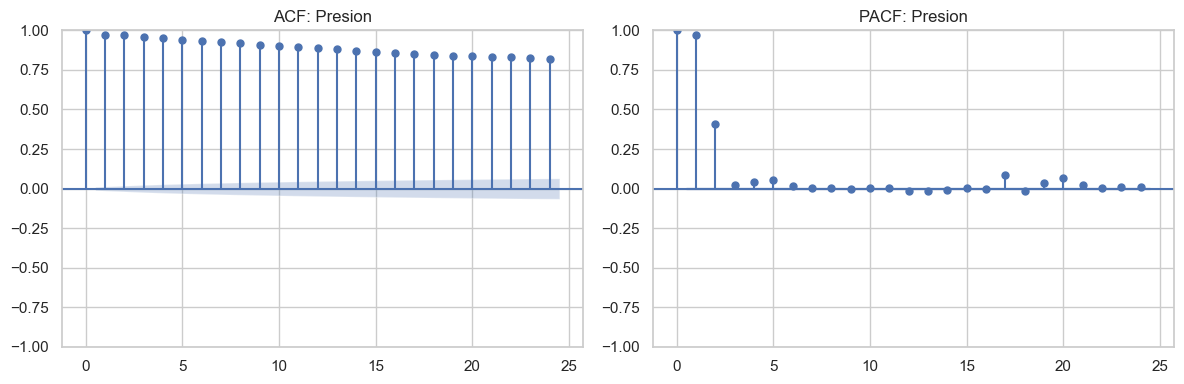

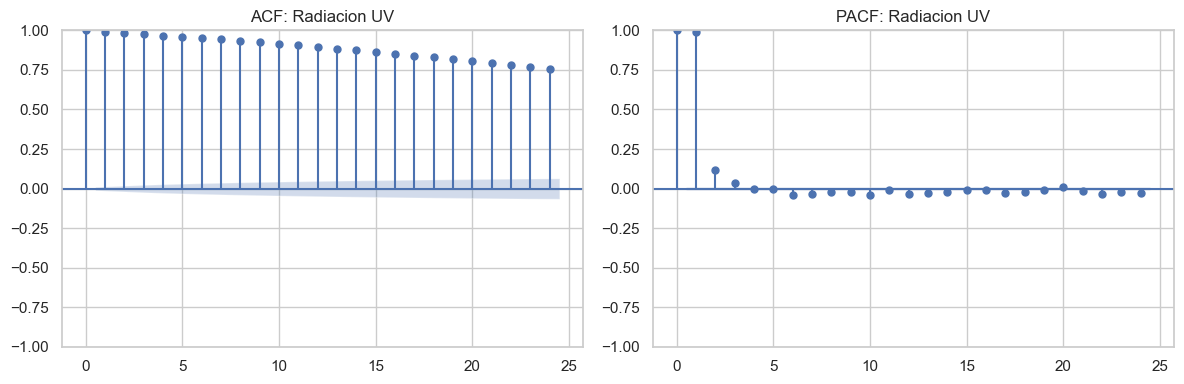

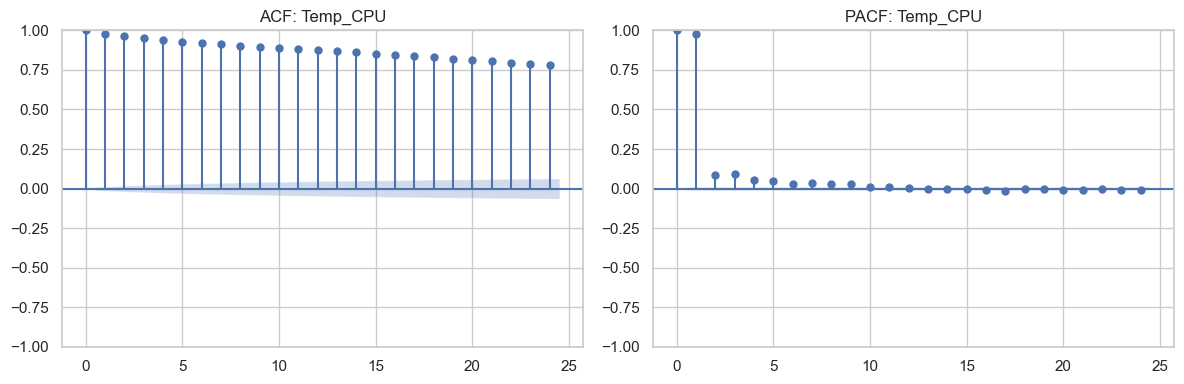

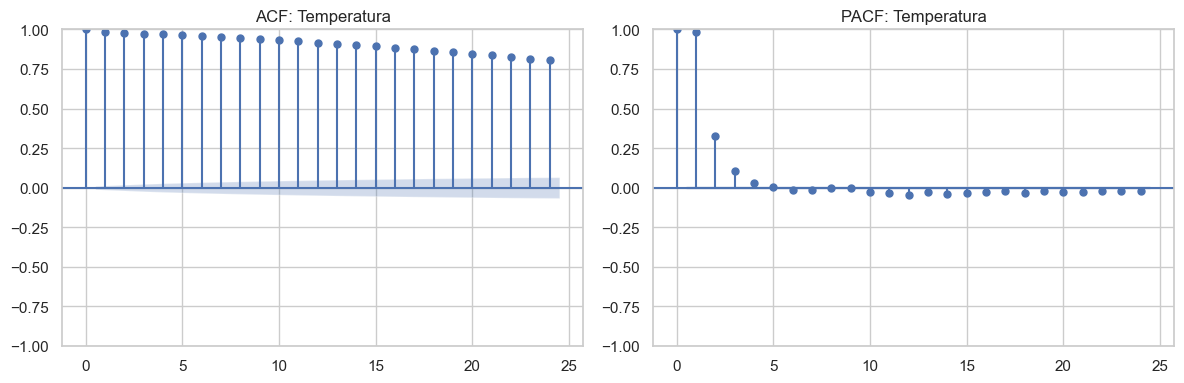

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Cargar y pivotear datos
dfa = pd.read_csv('estacion1.csv', parse_dates=['fecha'])
pivot_dfa = dfa.pivot(index='fecha', columns='sensor_name', values='sensor_dato')
pivot_dfa = pivot_dfa.apply(pd.to_numeric, errors='coerce')

# 1. Análisis de estacionalidad y tendencia
for col in pivot_dfa.columns:
    serie = pivot_dfa[col].dropna()
    if len(serie) > 30:  # Necesitas suficientes datos para descomponer
        result = seasonal_decompose(serie, model='additive', period=24)  # Ajusta 'period' según tus datos
        result.plot()
        plt.suptitle(f'Descomposición estacional: {col}')
        plt.show()

# 2. Autocorrelación y lags
for col in pivot_dfa.columns:
    serie = pivot_dfa[col].dropna()
    if len(serie) > 30:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        plot_acf(serie, ax=axes[0], lags=24)
        plot_pacf(serie, ax=axes[1], lags=24)
        axes[0].set_title(f'ACF: {col}')
        axes[1].set_title(f'PACF: {col}')
        plt.tight_layout()
        plt.show()

ACF (Autocorrelation Function) y PACF (Partial Autocorrelation Function) son herramientas estadísticas para analizar series de tiempo:

ACF (Función de Autocorrelación):
Mide la correlación entre una serie temporal y sus propios valores en diferentes retardos (lags). Ayuda a identificar patrones repetitivos y la dependencia temporal.

PACF (Función de Autocorrelación Parcial):
Mide la correlación entre la serie y sus retardos, eliminando la influencia de los retardos intermedios. Es útil para identificar el número de lags directos que afectan a la serie.

En resumen:

ACF muestra la correlación total para cada lag.
PACF muestra la correlación directa para cada lag, eliminando efectos indirectos.

ACF (izquierda)
Todas las barras hasta el lag 24 son muy altas y están fuera del intervalo de confianza.
Esto indica que la serie es altamente autocorrelacionada: el valor actual depende mucho de los valores anteriores, incluso hasta 24 pasos atrás.
Puede indicar una tendencia fuerte o que la serie no es estacionaria.
PACF (derecha)
Solo los primeros 2 lags (lag 1 y lag 2) son significativamente altos y sobresalen del intervalo de confianza.
A partir del lag 3, las barras están dentro del intervalo de confianza (no significativas).
¿Cuántos lags usar?
PACF sugiere que los lags 1 y 2 son los más relevantes para predecir el siguiente valor de temperatura.
ACF muestra dependencia a largo plazo, pero para modelos como TFT, lo más importante suelen ser los lags significativos en PACF.
Conclusión:

Puedes usar 2 lags como mínimo para la variable Temperatura.
Si tu modelo lo permite y tienes muchos datos, podrías experimentar con más lags, pero 2 es un buen punto de partida según este análisis.

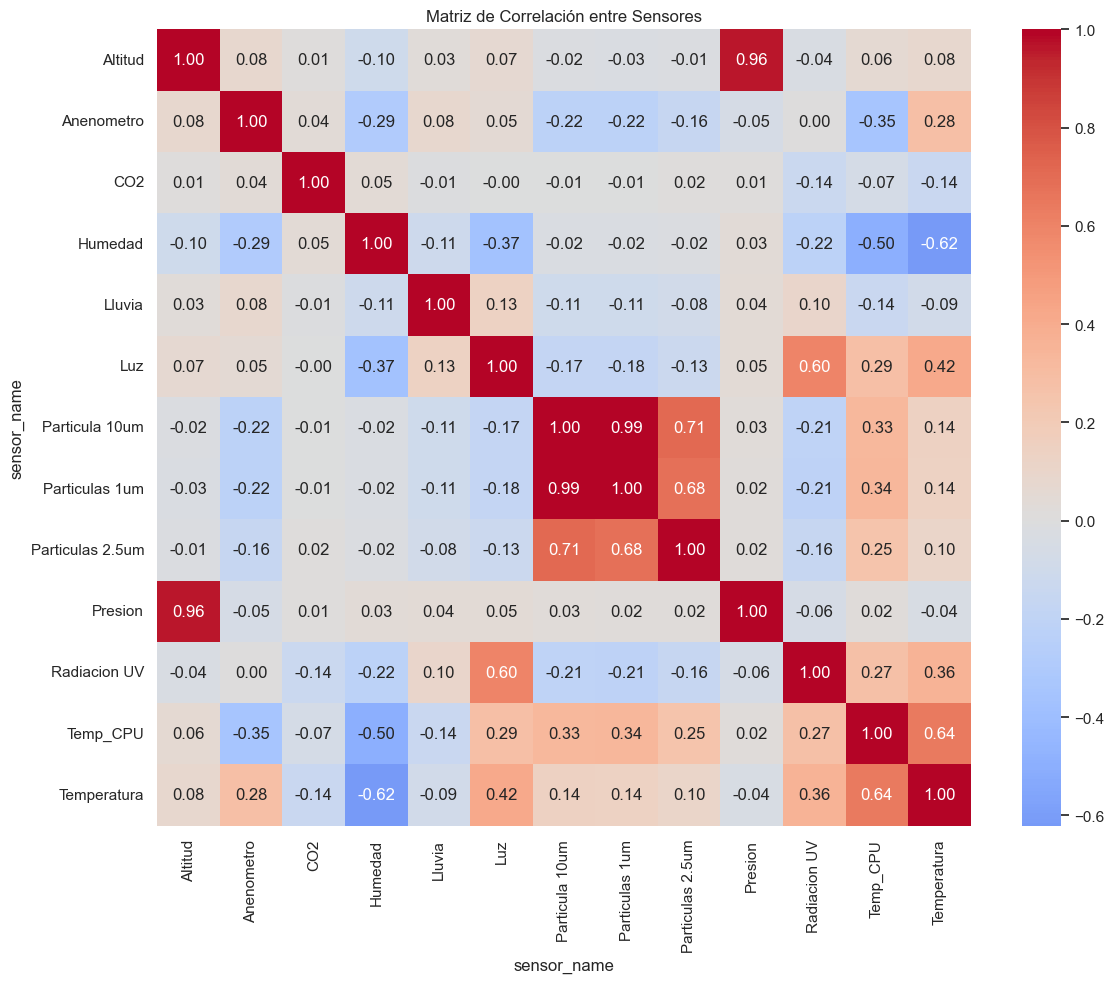

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlación entre Sensores")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Usamos el DataFrame pivotado que tiene sensores como columnas y fecha como índice
scaler = MinMaxScaler()

# Aplicar normalización min-max a cada columna (sensor)
df_normalizado = pd.DataFrame(
    scaler.fit_transform(df_pivot),
    columns=df_pivot.columns,
    index=df_pivot.index
)


<Axes: title={'center': 'Series normalizadas'}, xlabel='fecha'>

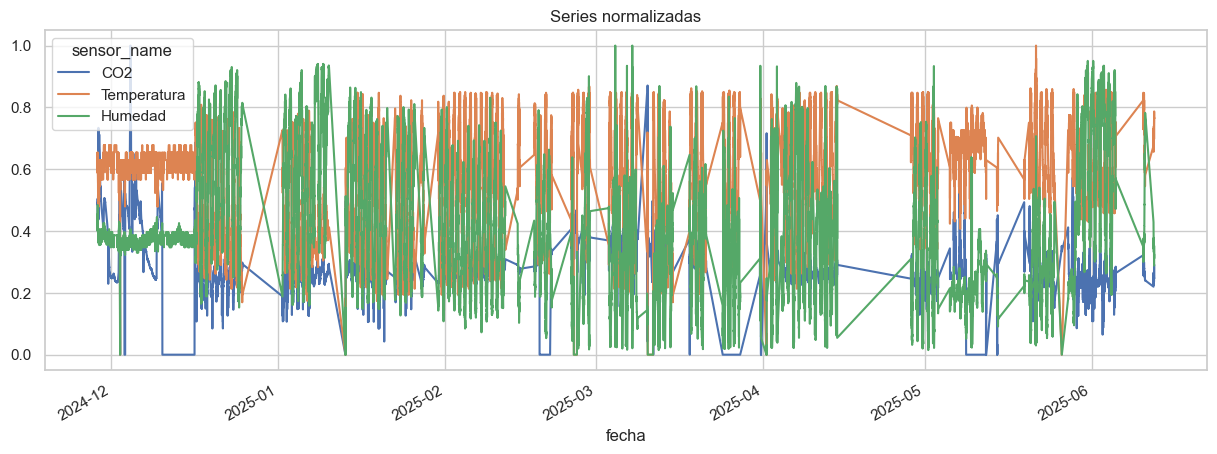

In [ ]:
df_normalizado[['CO2', 'Temperatura', 'Humedad']].plot(figsize=(15, 5), title='Series normalizadas')


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Verifica que el índice sea datetime si aún no lo es
df_pivot.index = pd.to_datetime(df_pivot.index)

# Inicializar el escalador
scaler = MinMaxScaler()

# Aplicar el escalado por columna (sensor)
df_normalizado = pd.DataFrame(
    scaler.fit_transform(df_pivot),
    columns=df_pivot.columns,
    index=df_pivot.index
)

print("Datos normalizados (rango [0, 1]):")
display(df_normalizado.head())


Datos normalizados (rango [0, 1]):


sensor_name,Altitud,Anenometro,CO2,Humedad,Lluvia,Luz,Particula 10um,Particulas 1um,Particulas 2.5um,Presion,Radiacion UV,Temp_CPU,Temperatura
fecha,,,,,,,,,,,,,
2024-11-28 09:30:15,0.926478,0.0,0.445464,0.445545,0.0,0.000420,0.047508,0.203552,0.931838,0.994239,0.0,0.755459,0.653753
2024-11-28 09:35:03,0.926321,0.0,0.445599,0.445545,0.0,0.000486,0.042708,0.027945,0.962461,0.994239,0.0,0.744541,0.653753
2024-11-28 09:39:53,0.926242,0.0,0.446206,0.400990,0.0,0.000473,0.041960,0.027959,0.962461,0.994239,0.0,0.755459,0.588378
2024-11-28 09:44:42,0.926321,0.0,0.446003,0.445545,0.0,0.000489,0.042356,0.027937,0.962461,0.994352,0.0,0.744541,0.653753
2024-11-28 09:49:31,0.926164,0.0,0.446408,0.445545,0.0,0.000588,0.045029,0.027952,0.962461,0.994352,0.0,0.755459,0.653753


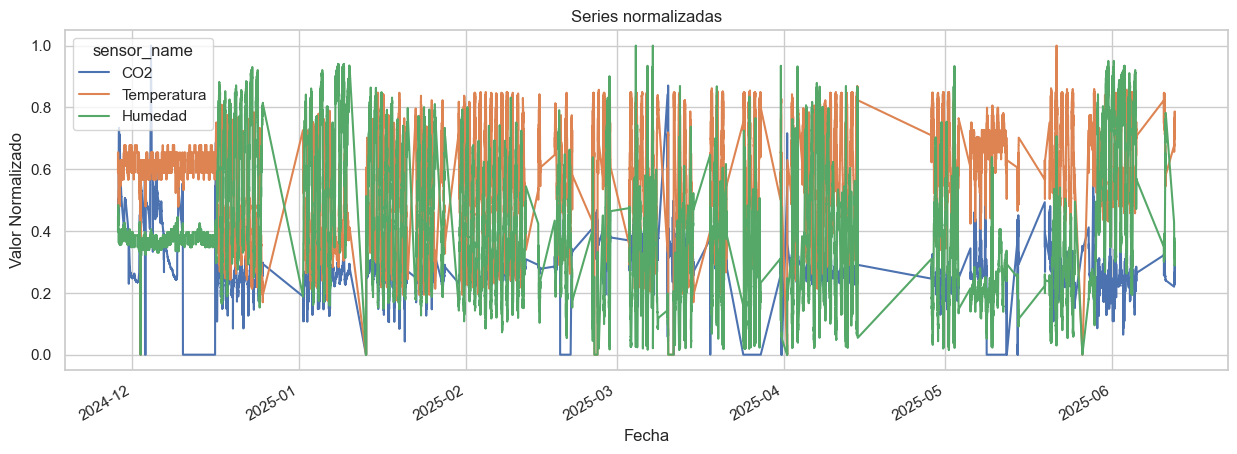

In [ ]:
import matplotlib.pyplot as plt

# Verificar forma de las series normalizadas
df_normalizado[['CO2', 'Temperatura', 'Humedad']].plot(figsize=(15, 5), title='Series normalizadas')
plt.xlabel("Fecha")
plt.ylabel("Valor Normalizado")
plt.grid(True)
plt.show()


In [ ]:
# 1. Asegurar que el índice esté ordenado
df_normalizado = df_normalizado.sort_index()

# 2. Crear un rango de fechas con frecuencia fija (basado en tus datos: cada 5 minutos)
full_index = pd.date_range(
    start=df_normalizado.index.min(),
    end=df_normalizado.index.max(),
    freq='5min'  # puedes cambiar esto si usas otro intervalo
)

# 3. Reindexar y agregar filas faltantes
df_completo = df_normalizado.reindex(full_index)

# 4. Interpolación lineal de los valores faltantes
df_completo = df_completo.interpolate(method='linear')

# 5. (Opcional) Confirmar que ya no hay nulos
print("¿Aún hay NaNs?", df_completo.isnull().values.any())


¿Aún hay NaNs? False


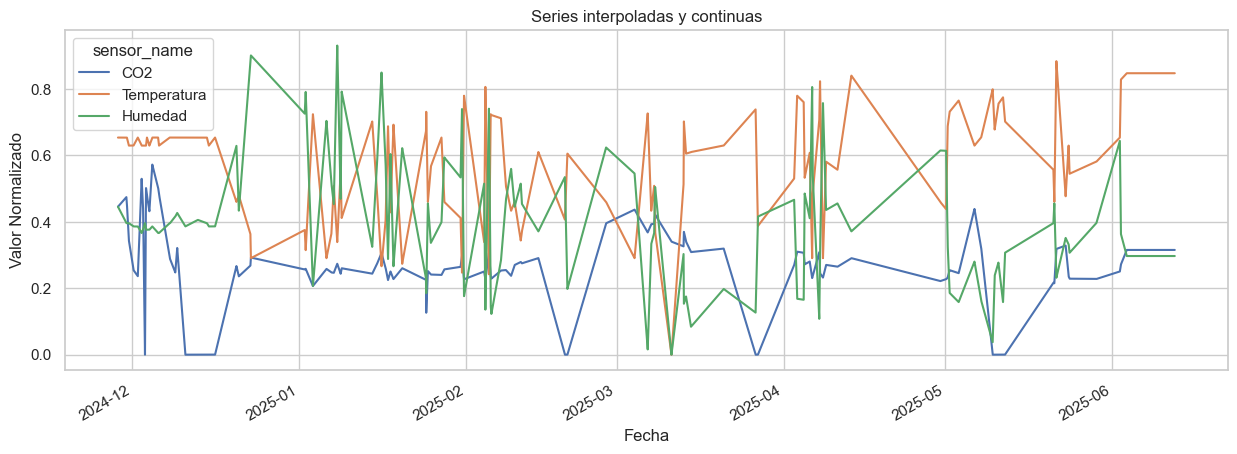

In [ ]:
# Verificación visual de continuidad tras interpolar
df_completo[['CO2', 'Temperatura', 'Humedad']].plot(figsize=(15, 5), title='Series interpoladas y continuas')
plt.xlabel("Fecha")
plt.ylabel("Valor Normalizado")
plt.grid(True)
plt.show()

In [ ]:
# Copiamos el DataFrame
df_tft = df_completo.copy()

# Resetear índice para trabajar con columnas
df_tft = df_tft.reset_index().rename(columns={'index': 'fecha'})

# Crear columna de índice temporal incremental
df_tft['time_idx'] = range(len(df_tft))

# Crear columna de grupo (una sola estación)
df_tft['estacion'] = 'Estacion_01'


In [ ]:
target_col = 'CO2'


In [ ]:
# Importante: renombrar columnas como strings
df_tft.columns = df_tft.columns.astype(str)

# Columnas que serán inputs reales (las que no son el target ni tiempo/grupo)
observed_cols = [col for col in df_completo.columns if col != target_col]

# Resultado
print("Columnas finales:")
print("-> Fecha:", "fecha")
print("-> Índice temporal:", "time_idx")
print("-> ID de serie:", "estacion")
print("-> Target a predecir:", target_col)
print("-> Variables observadas:", observed_cols)


Columnas finales:
-> Fecha: fecha
-> Índice temporal: time_idx
-> ID de serie: estacion
-> Target a predecir: CO2
-> Variables observadas: ['Altitud', 'Anenometro', 'Humedad', 'Lluvia', 'Luz', 'Particula 10um', 'Particulas 1um', 'Particulas 2.5um', 'Presion', 'Radiacion UV', 'Temp_CPU', 'Temperatura']


In [ ]:
# Mostrar las primeras filas del dataset final listo para usar con TFT
display(df_tft.head(10))  # Puedes cambiar a 20 o más si quieres ver más datos

# Ver estructura general
print("\nColumnas del DataFrame:")
print(df_tft.columns.tolist())

print("\nTipos de datos por columna:")
print(df_tft.dtypes)

print("\nForma del DataFrame:", df_tft.shape)


sensor_name,fecha,Altitud,Anenometro,CO2,Humedad,Lluvia,Luz,Particula 10um,Particulas 1um,Particulas 2.5um,Presion,Radiacion UV,Temp_CPU,Temperatura,time_idx,estacion
0,2024-11-28 09:30:15,0.926478,0.0,0.445464,0.445545,0.0,0.000420,0.047508,0.203552,0.931838,0.994239,0.0,0.755459,0.653753,0,Estacion_01
1,2024-11-28 09:35:15,0.926497,0.0,0.445528,0.445435,0.0,0.000419,0.047404,0.203102,0.929768,0.994236,0.0,0.755459,0.653753,1,Estacion_01
2,2024-11-28 09:40:15,0.926517,0.0,0.445592,0.445325,0.0,0.000418,0.047301,0.202652,0.927699,0.994233,0.0,0.755459,0.653753,2,Estacion_01
3,2024-11-28 09:45:15,0.926537,0.0,0.445657,0.445215,0.0,0.000417,0.047197,0.202202,0.925629,0.994230,0.0,0.755459,0.653753,3,Estacion_01
4,2024-11-28 09:50:15,0.926556,0.0,0.445721,0.445105,0.0,0.000416,0.047093,0.201751,0.923559,0.994227,0.0,0.755459,0.653753,4,Estacion_01
5,2024-11-28 09:55:15,0.926576,0.0,0.445785,0.444994,0.0,0.000415,0.046990,0.201301,0.921489,0.994224,0.0,0.755459,0.653753,5,Estacion_01
6,2024-11-28 10:00:15,0.926596,0.0,0.445850,0.444884,0.0,0.000414,0.046886,0.200851,0.919420,0.994221,0.0,0.755459,0.653753,6,Estacion_01
7,2024-11-28 10:05:15,0.926615,0.0,0.445914,0.444774,0.0,0.000414,0.046782,0.200400,0.917350,0.994218,0.0,0.755459,0.653753,7,Estacion_01
8,2024-11-28 10:10:15,0.926635,0.0,0.445978,0.444664,0.0,0.000413,0.046678,0.199950,0.915280,0.994215,0.0,0.755459,0.653753,8,Estacion_01
9,2024-11-28 10:15:15,0.926655,0.0,0.446042,0.444554,0.0,0.000412,0.046575,0.199500,0.913211,0.994212,0.0,0.755459,0.653753,9,Estacion_01



Columnas del DataFrame:
['fecha', 'Altitud', 'Anenometro', 'CO2', 'Humedad', 'Lluvia', 'Luz', 'Particula 10um', 'Particulas 1um', 'Particulas 2.5um', 'Presion', 'Radiacion UV', 'Temp_CPU', 'Temperatura', 'time_idx', 'estacion']

Tipos de datos por columna:
sensor_name
fecha               datetime64[ns]
Altitud                    float64
Anenometro                 float64
CO2                        float64
Humedad                    float64
Lluvia                     float64
Luz                        float64
Particula 10um             float64
Particulas 1um             float64
Particulas 2.5um           float64
Presion                    float64
Radiacion UV               float64
Temp_CPU                   float64
Temperatura                float64
time_idx                     int64
estacion                    object
dtype: object

Forma del DataFrame: (56505, 16)


In [ ]:
df_tft = df_tft.rename(columns={
    "Particulas 2.5um": "Particulas_2_5um",
    "Particula 10um": "Particula_10um",
    "Particulas 1um": "Particulas_1um",
    "Radiacion UV": "Radiacion_UV",
    "Temp_CPU": "Temp_CPU"
})




In [ ]:

from pytorch_forecasting import TimeSeriesDataSet

max_encoder_length = 24 * 6  # por ejemplo, 6 horas de histórico con datos cada 10 minutos
max_prediction_length = 6 * 2  # predecir la siguiente hora

training = TimeSeriesDataSet(
    df_tft,
    time_idx="time_idx",
    target="CO2",  # este es el sensor que vamos a predecir
    group_ids=["estacion"],
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=["estacion"],
    time_varying_known_reals=["time_idx"],
    time_varying_unknown_reals=[
    "CO2", "Temperatura", "Humedad", "Presion", "Luz", "Radiacion_UV",
    "Particula_10um", "Particulas_2_5um", "Particulas_1um",
    "Temp_CPU", "Altitud", "Anenometro", "Lluvia"
],
)


KeyError: "None of [Index(['Particulas_2_5um'], dtype='object', name='sensor_name')] are in the [columns]"

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = training.to_dataloader(train=True, batch_size=64, num_workers=0)


In [ ]:
from pytorch_forecasting import TemporalFusionTransformer

tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)
